In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
from pylab import figure, subplot, text, xlim, ylim, title, plot, axvline, ylabel, xlabel, legend
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, describe, spearmanr
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
import os

In [2]:
list_csv = os.listdir('/home/mzo5929/Keerthana/grnInference/simulationData/large_scale_parameter_scan/two_way_regulation_new/')
len(list_csv)

25000

In [3]:
import os
os.environ['PATH'] = "/software/texlive/2020/bin/x86_64-linux:" + os.environ['PATH']
matplotlib.rcParams['text.usetex'] = False
orig_params = pylab.rcParams.copy()
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 10),
          'axes.labelsize': '20',
          'axes.titlesize':'25',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
          'axes.linewidth': '0.5',
          'pdf.fonttype': '42'}
pylab.rcParams.update(params)
# pylab.style.use('seaborn-white')

In [6]:
#PARAM VALS FOR THIS RUN
# sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/simulations_parameter_scan_ec50_equals_median_kOn_added/k_Tf_on/samples_replicates_over_time_with_regulation_param_index_9_run_9.csv'
sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/large_scale_parameter_scan/two_way_regulation_new/samples_replicates_with_regulation_two_way_regulation_2564.csv'
# sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/general_simulation_data/test_data/simulation_matrix101_different_weights_A<->B_20213_param.csv'
num_sampling_times = 24
num_cells = 20e3

updated_df = pd.read_csv(sim_file_use)
updated_df['unspliced_Target'] = updated_df['unspliced_unlabeled_Target']+updated_df['unspliced_labeled_Target']
updated_df['unspliced_TF'] = updated_df['unspliced_unlabeled_TF']+updated_df['unspliced_labeled_TF']

updated_df['labeled_Target'] = updated_df['unspliced_labeled_Target']+updated_df['spliced_labeled_Target']
updated_df['labeled_TF'] = updated_df['unspliced_labeled_TF']+updated_df['spliced_labeled_TF']

updated_df['unlabeled_Target'] = updated_df['unspliced_unlabeled_Target']+updated_df['spliced_unlabeled_Target']
updated_df['unlabeled_TF'] = updated_df['unspliced_unlabeled_TF']+updated_df['spliced_unlabeled_TF']

updated_df

Unnamed: 0  TF_is_bursting  Target_is_bursting  TF_protein_1K  \
0                0           False               False     149.879860   
1                1           False               False    1607.035337   
2                2           False               False    1442.597691   
3                3           False                True    1537.465671   
4                4            True               False    1376.255270   
...            ...             ...                 ...            ...   
999995      999995           False                True    1476.625715   
999996      999996           False               False     132.773656   
999997      999997           False               False    1597.917049   
999998      999998           False               False    1633.907104   
999999      999999           False                True    1622.700082   

        Target_protein_1K  spliced_labeled_Target  spliced_labeled_TF  \
0             5778.101473                0.000000            0.000000   
1            44413.272194                0.000000            0.000000   
2            50785.617374                0.000000            0.000000   
3            51485.935324                0.000000            0.000000   
4            46054.325760                0.000000            0.000000   
...                   ...                     ...                 ...   
999995       44377.803939                6.592920           13.440032   
999996        3595.436948                0.000000            4.352733   
999997       45706.049469               20.581120            7.087299   
999998       44219.652846               10.778761            7.734566   
999999       47826.221944               13.581120           16.734566   

        spliced_unlabeled_Target  spliced_unlabeled_TF  \
0                     262.246778            143.386160   
1                    2140.238211           1938.822320   
2                    1741.619123           1853.278857   
3                    2196.663121           1866.768810   
4                    2714.741902           2028.493108   
...                          ...                   ...   
999995               2679.873345           2005.851250   
999996                250.710506             68.069152   
999997               2600.062026           1939.452278   
999998               2541.152514           1842.607677   
999999               2674.308301           1893.491958   

        unspliced_labeled_Target  ...  k_on_TF_adjusted  total_TF_mRNA  \
0                   0.000000e+00  ...          0.435638     143.386160   
1                   0.000000e+00  ...          6.689951    1994.580177   
2                   0.000000e+00  ...          6.755824    1866.893180   
3                   0.000000e+00  ...          6.760667    1874.791889   
4                   0.000000e+00  ...          6.711622    2041.380212   
...                          ...  ...               ...            ...   
999995             4.194582e-169  ...          6.689352    2081.072375   
999996              0.000000e+00  ...          0.406444      72.421885   
999997             2.004214e-166  ...          6.707285    1973.503653   
999998             3.568161e-166  ...          6.687026    1856.852738   
999999             3.268232e-166  ...          6.730838    1929.528443   

        total_Target_mRNA  sampling_time  replicate  unspliced_TF  \
0              263.246778              0          0  3.377184e-18   
1             2164.022147              0          0  4.975786e+01   
2             1747.622119              0          0  8.614324e+00   
3             2200.781392              0          0  1.023078e+00   
4             2822.405086              0          0  8.887104e+00   
...                   ...            ...        ...           ...   
999995        2761.453023           1440          1  6.178109e+01   
999996         250.710506           1440          1  7.661420e-41   
999997        2624.627803           1440       

(40000, 29)


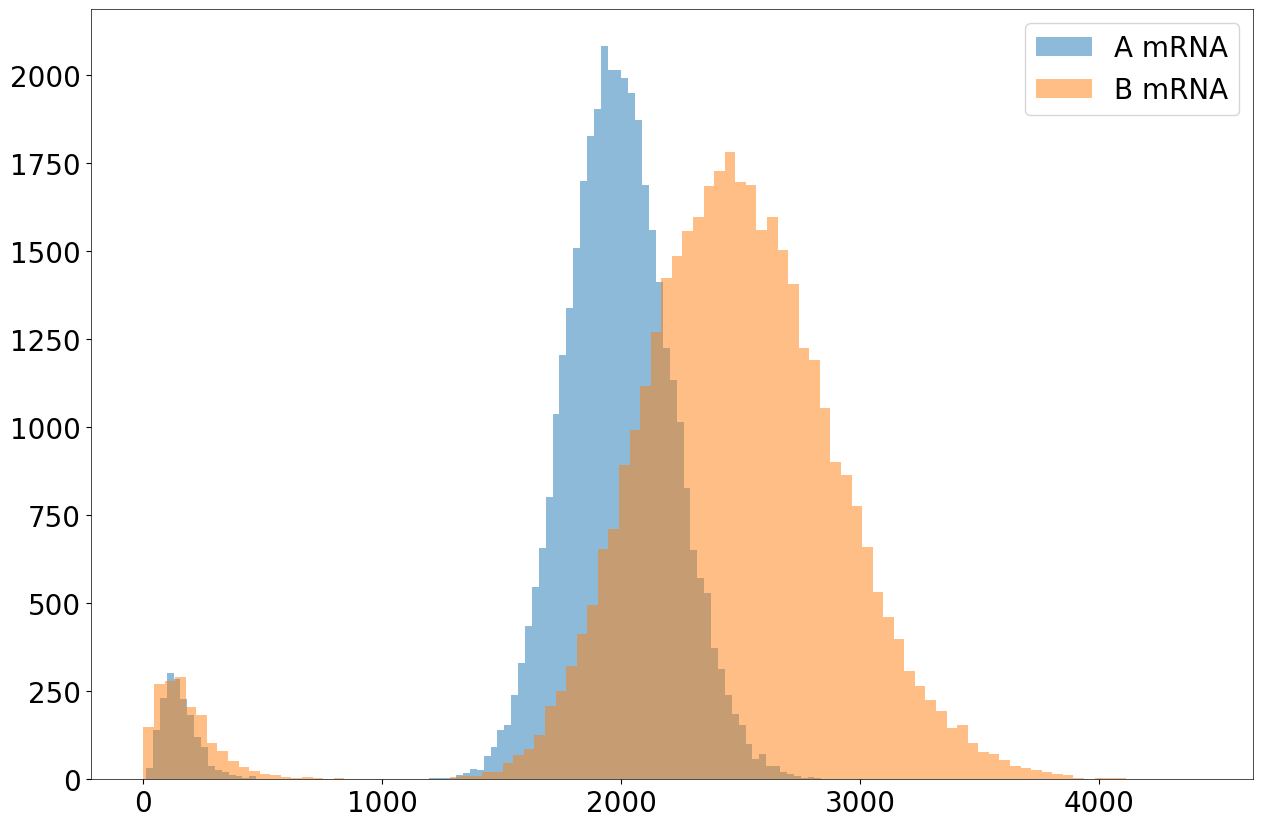

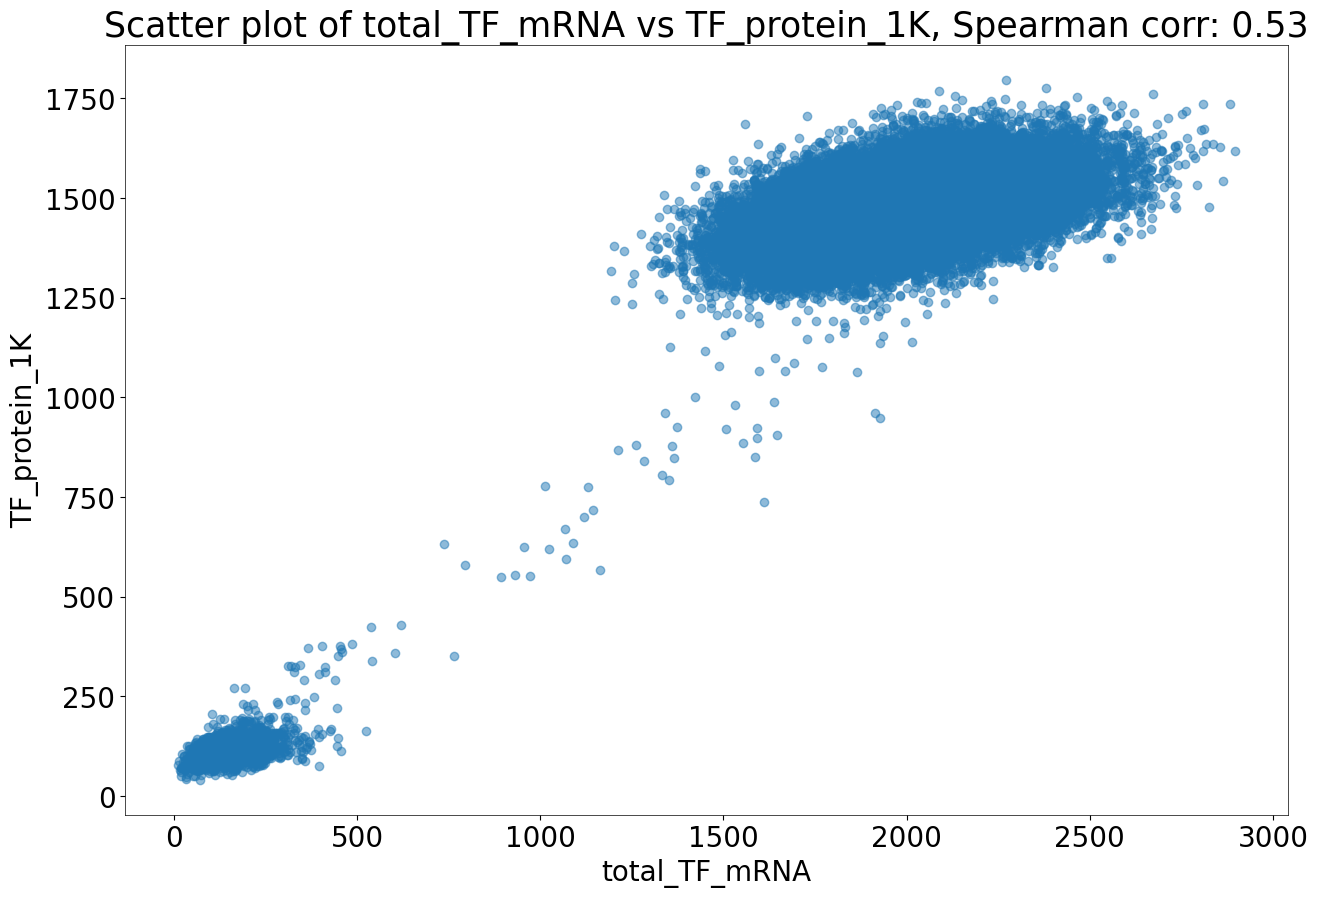

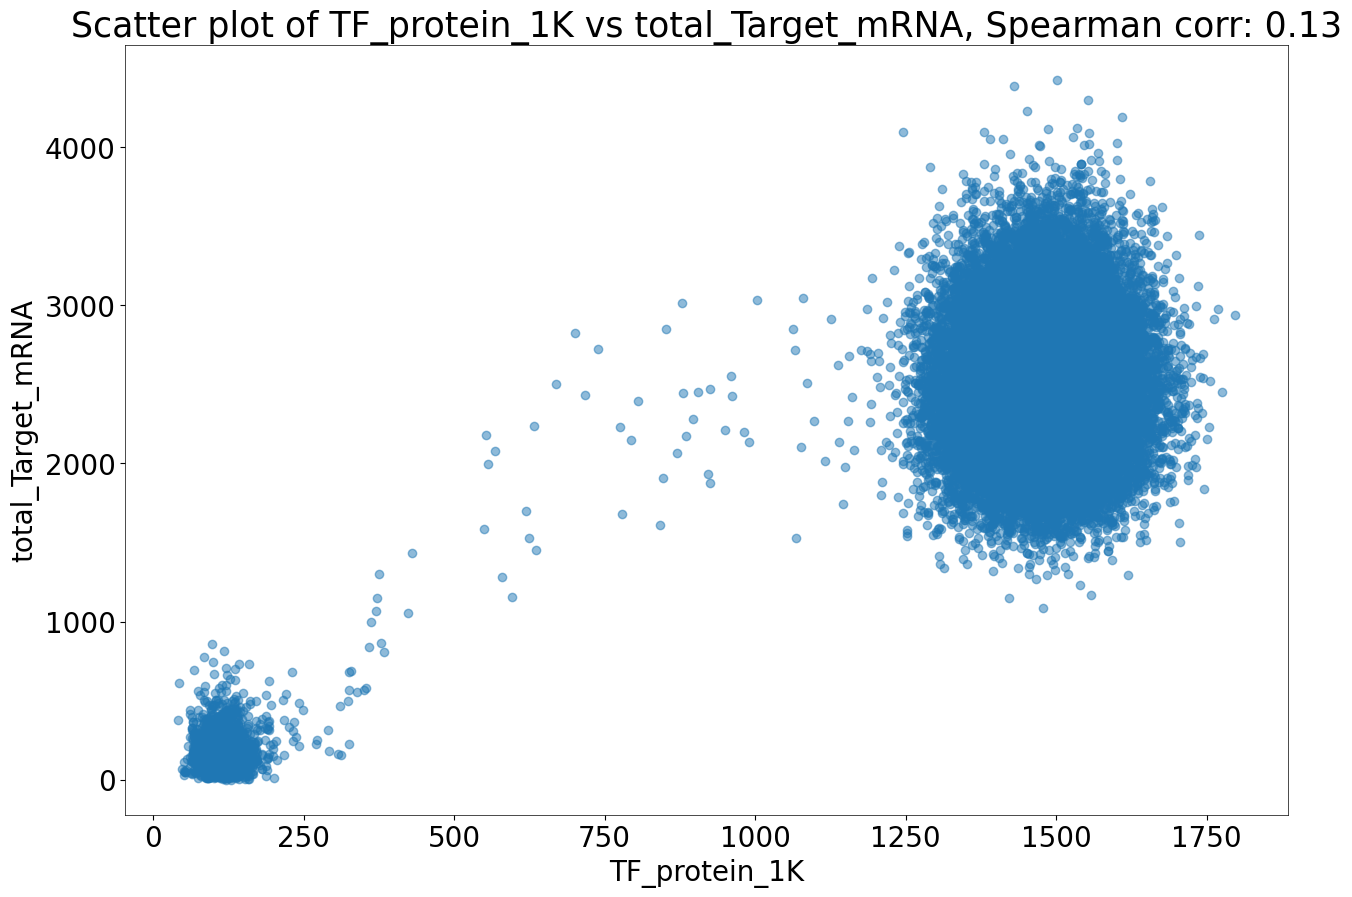

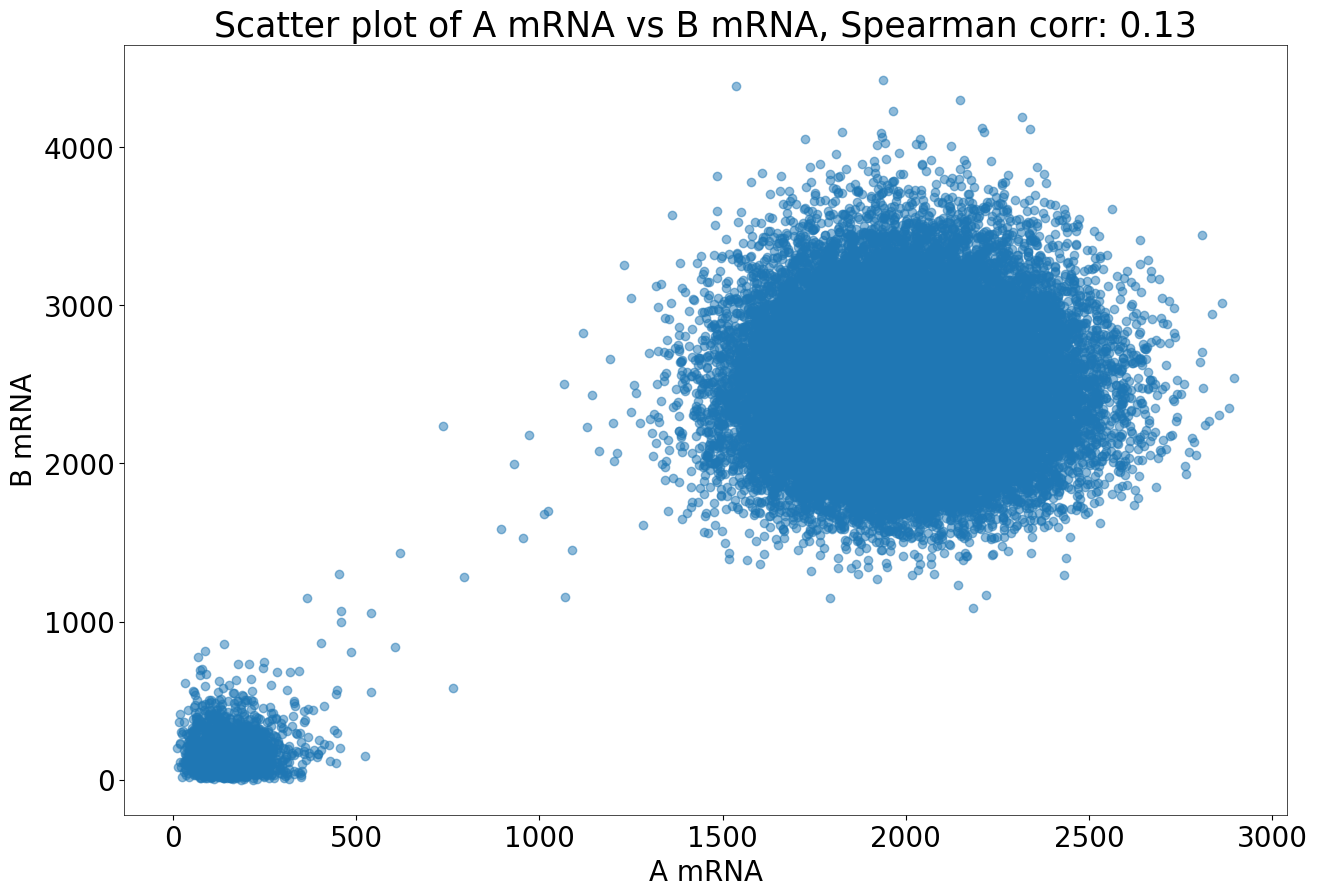

In [7]:
#First compare regulation
time = 300
singleTime_df = updated_df[updated_df['sampling_time'] == time]
singleTime_df = singleTime_df.reset_index(drop=True)
print(singleTime_df.shape)
#Select the top and bottom 10 percentile of the TF mRNA
singleTime_df = singleTime_df.sort_values(by='total_TF_mRNA')
top_10 = singleTime_df.tail(int(len(singleTime_df)*0.1))
bottom_10 = singleTime_df.head(int(len(singleTime_df)*0.1))

#Combined top and bottom 10 percentile
combined_10 =  singleTime_df #pd.concat([top_10, bottom_10])

plt.hist((combined_10['total_TF_mRNA']), bins=100, alpha=0.5, label='A mRNA')
plt.hist(combined_10['total_Target_mRNA'], bins=100, alpha=0.5, label='B mRNA')
plt.legend(loc='upper right')
plt.show()

plt.scatter((combined_10['total_TF_mRNA']), combined_10['TF_protein_1K'], alpha=0.5)
corr = spearmanr(combined_10['TF_protein_1K'], (combined_10['spliced_unlabeled_TF'] + combined_10['spliced_labeled_TF']))
plt.ylabel('TF_protein_1K')
plt.xlabel('total_TF_mRNA')
plt.title('Scatter plot of total_TF_mRNA vs TF_protein_1K, Spearman corr: {:.2f}'.format(corr.correlation))
plt.show()

plt.scatter(combined_10['TF_protein_1K'], combined_10['total_Target_mRNA'], alpha=0.5)
corr = spearmanr(combined_10['TF_protein_1K'], combined_10['total_Target_mRNA'])
plt.xlabel('TF_protein_1K')
plt.ylabel('total_Target_mRNA')
plt.title(f'Scatter plot of TF_protein_1K vs total_Target_mRNA, Spearman corr: {corr.correlation:.2f}')
plt.show()

plt.scatter((singleTime_df['total_TF_mRNA']), singleTime_df['total_Target_mRNA'], alpha=0.5)
corr = spearmanr((singleTime_df['spliced_unlabeled_TF'] + singleTime_df['spliced_labeled_TF']), singleTime_df['total_Target_mRNA'])
plt.xlabel('A mRNA')
plt.ylabel('B mRNA')
plt.title(f'Scatter plot of A mRNA vs B mRNA, Spearman corr: {corr[0]:.2f}')
plt.show()

# Calculating bimodal coefficient for the distribution of the two genes

$BC = \frac{1 + \gamma_1^2}{\gamma_2 + 3*\frac{(n-1)^2}{(n-2)(n-3)}}$


BIC (1 component): 598626.91
BIC (2 components): 554727.47
BIC (3 components): 554876.46
2-component model is better → strong evidence for bimodality


/home/mzo5929/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


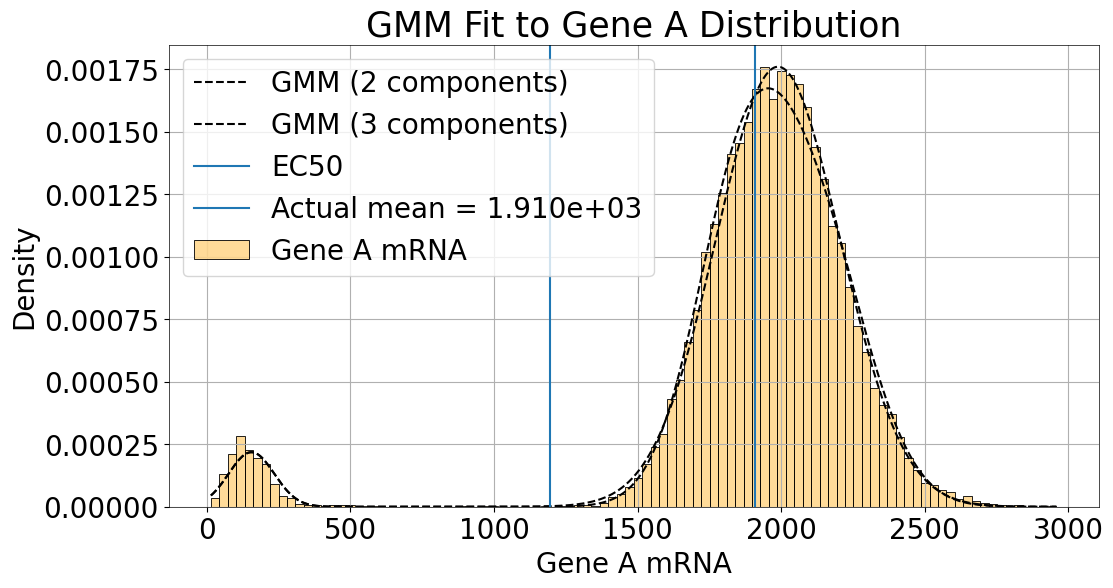

In [71]:
from sklearn.mixture import GaussianMixture
import numpy as np

time = 0
singleTime_df = updated_df[updated_df['sampling_time'] == time]
gene_A_dist = singleTime_df['total_TF_mRNA'].to_numpy()
gene_B_dist = singleTime_df['total_Target_mRNA'].to_numpy()
# Use the mRNA distribution you're testing
X = gene_A_dist.reshape(-1, 1)  # GMM needs 2D input

# Fit GMM with 1 component (unimodal)
gmm1 = GaussianMixture(n_components=1, random_state=0).fit(X)
bic1 = gmm1.bic(X)

# Fit GMM with 2 components (bimodal)
gmm2 = GaussianMixture(n_components=2, random_state=0).fit(X)
bic2 = gmm2.bic(X)

gmm3 = GaussianMixture(n_components=3, random_state=0).fit(X)
bic3 = gmm3.bic(X)

print(f"BIC (1 component): {bic1:.2f}")
print(f"BIC (2 components): {bic2:.2f}")
print(f"BIC (3 components): {bic3:.2f}")

if bic2 < bic1:
    print("2-component model is better → strong evidence for bimodality")
else:
    print("1-component model is sufficient → likely unimodal")

import matplotlib.pyplot as plt
import seaborn as sns

x_vals = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
logprob = gmm2.score_samples(x_vals)
pdf = np.exp(logprob)
x_vals = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
logprob_3 = gmm3.score_samples(x_vals)
pdf_3 = np.exp(logprob_3)

plt.figure(figsize=(12, 6))
sns.histplot(X.flatten(), bins=100, stat="density", color="orange", alpha=0.4, label='Gene A mRNA')
plt.plot(x_vals, pdf, 'k--', label='GMM (2 components)')
plt.plot(x_vals, pdf_3, 'k--', label='GMM (3 components)')
plt.axvline(1194, label = "EC50")
plt.axvline(np.mean(X.flatten()), label = f"Actual mean = {np.mean(X.flatten()):.3e}")
plt.xlabel("Gene A mRNA")
plt.ylabel("Density")
plt.title("GMM Fit to Gene A Distribution")
plt.grid(True)
plt.legend()
plt.show()

In [58]:
from scipy.signal import find_peaks

# Already have x_vals and pdf (from GMM score_samples)
peaks, _ = find_peaks(pdf_3)
num_modes = len(peaks)

print(f"Number of modes in GMM(3) density: {num_modes}")
mode_locations = x_vals[peaks]
print("Modes are at:", mode_locations.flatten())


Number of modes in GMM(3) density: 2
Modes are at: [ 153.27000595 1959.50153268]


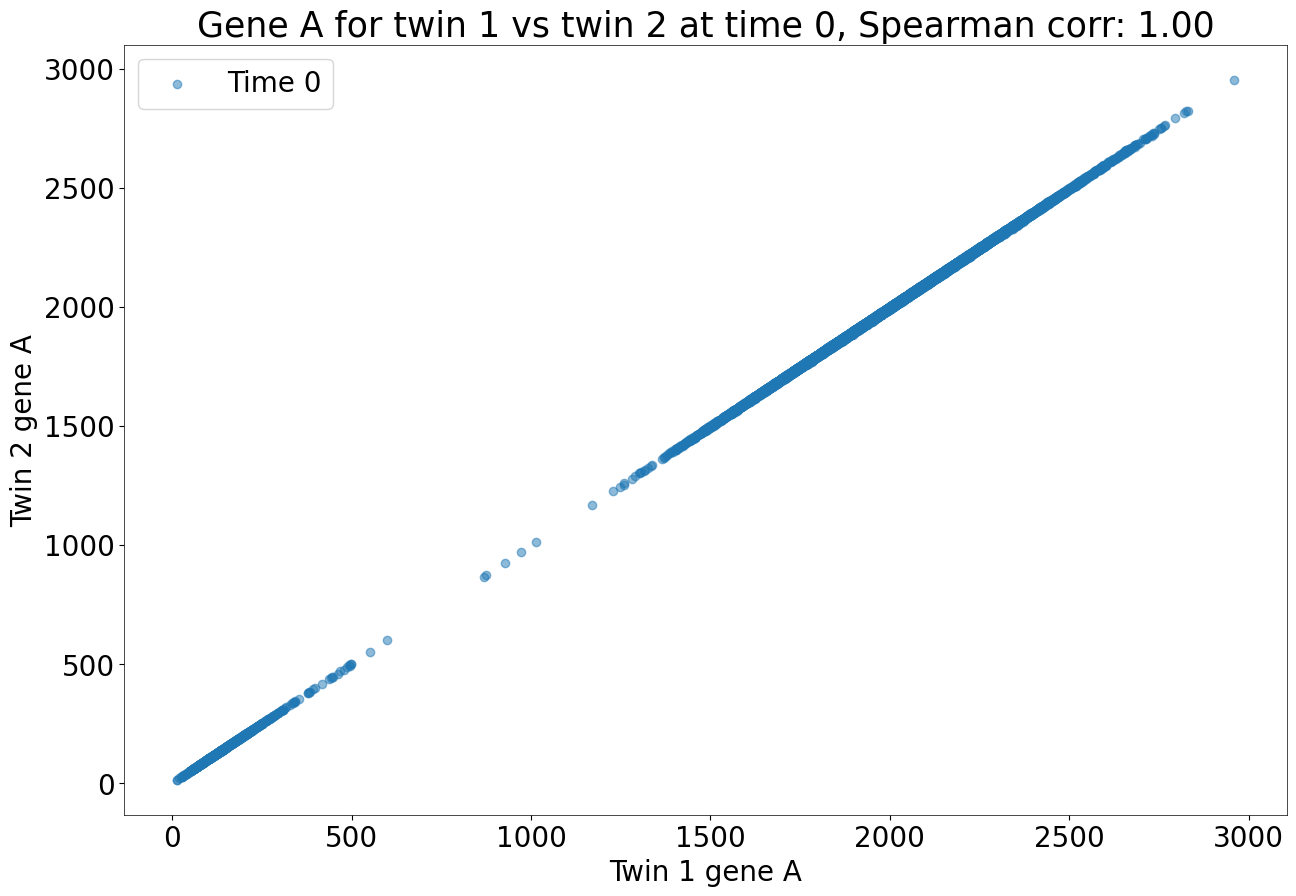

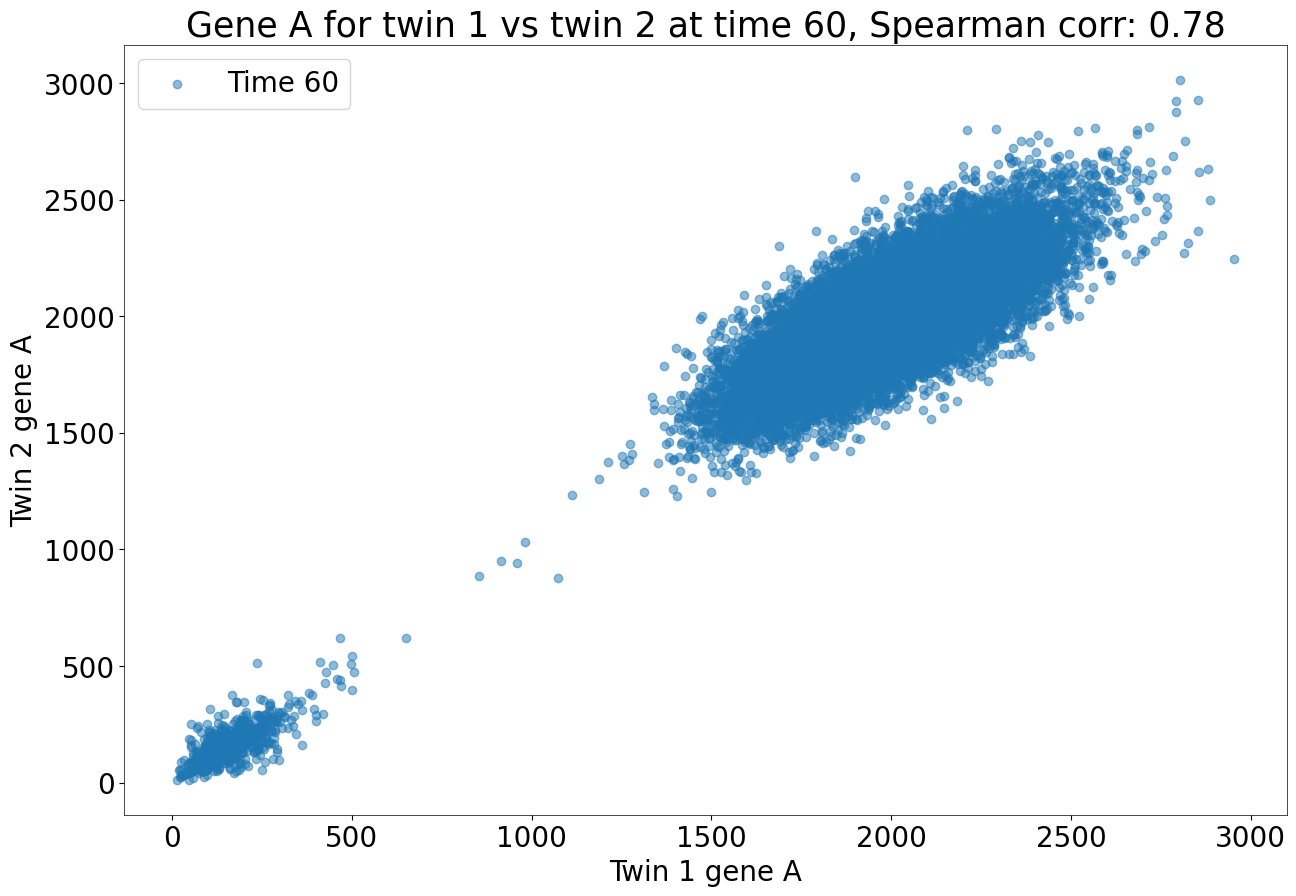

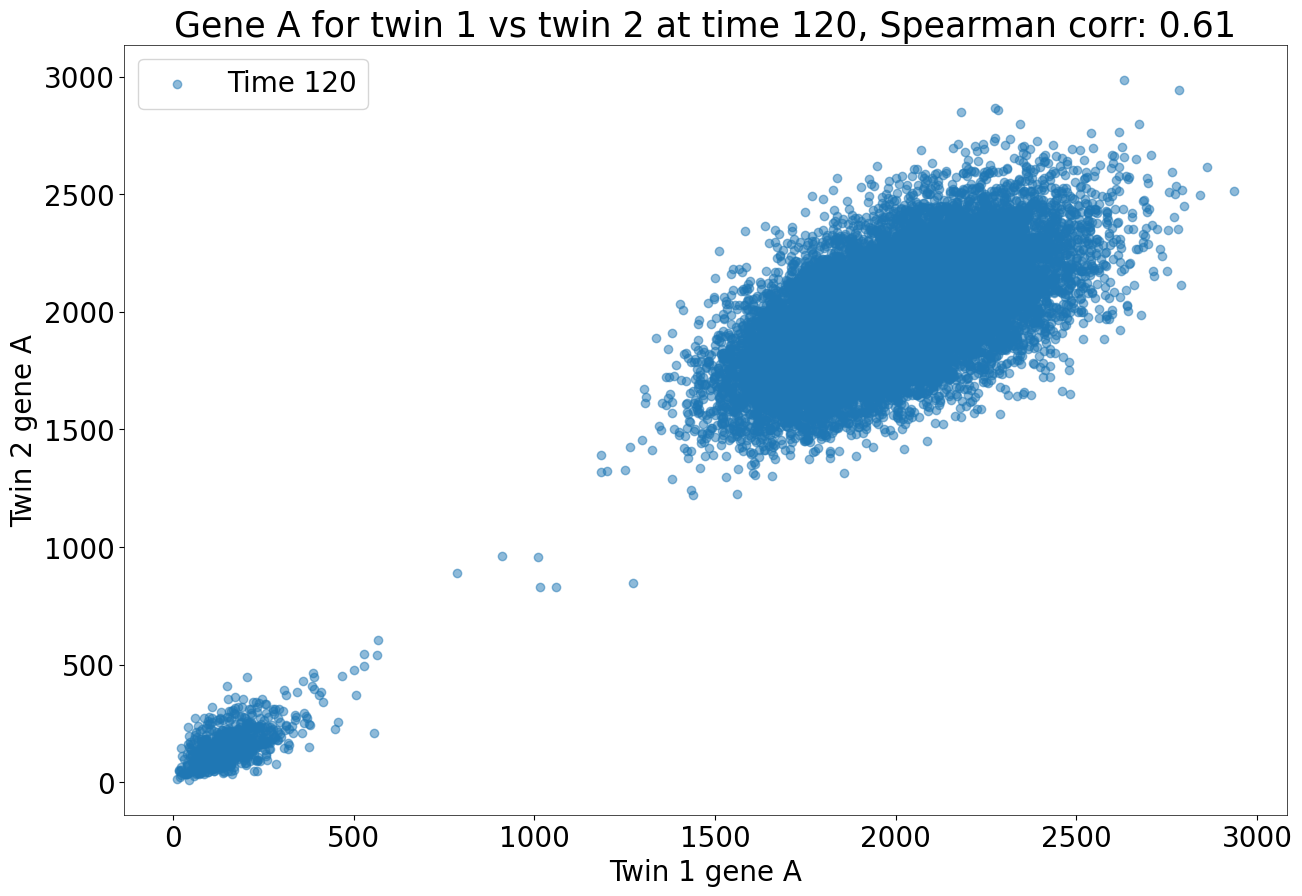

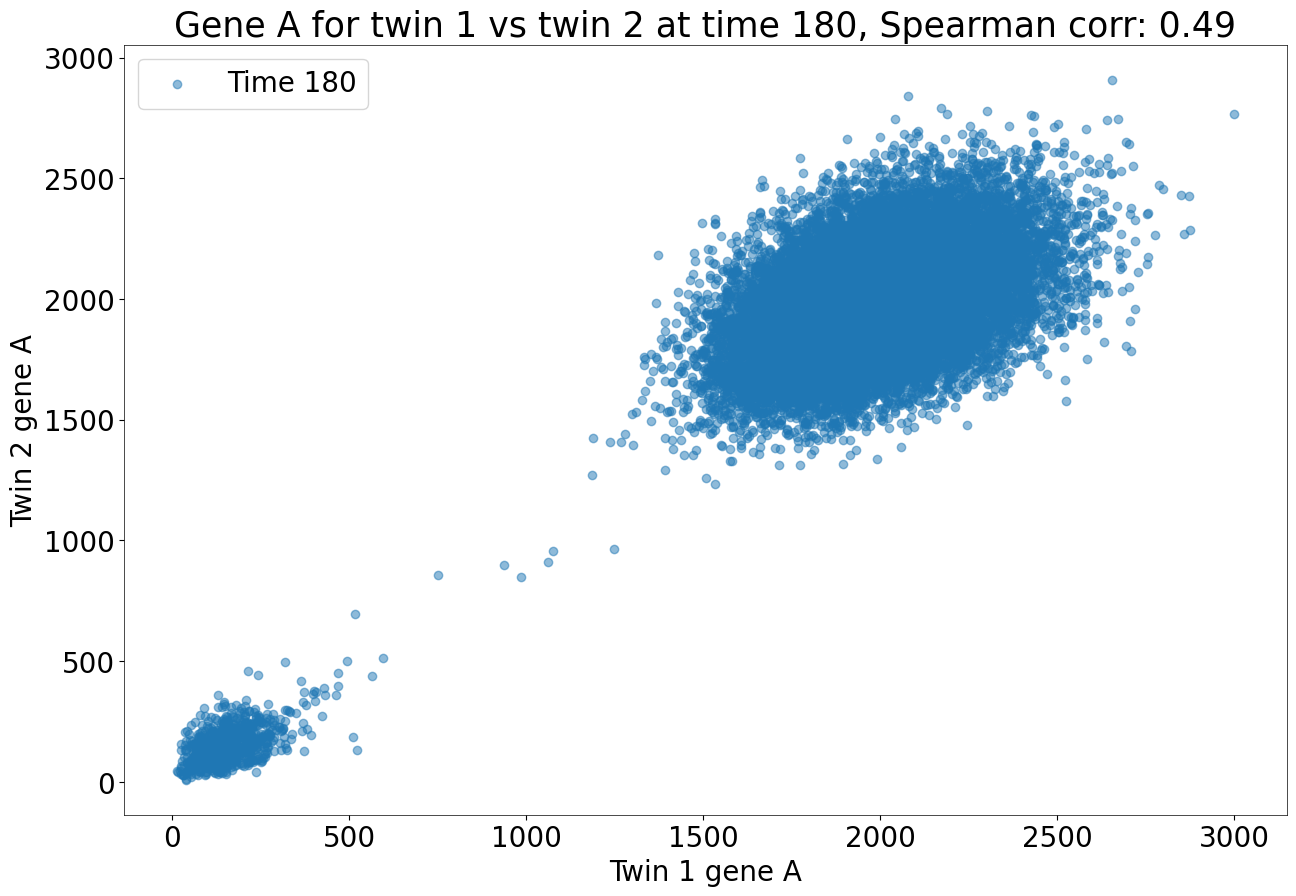

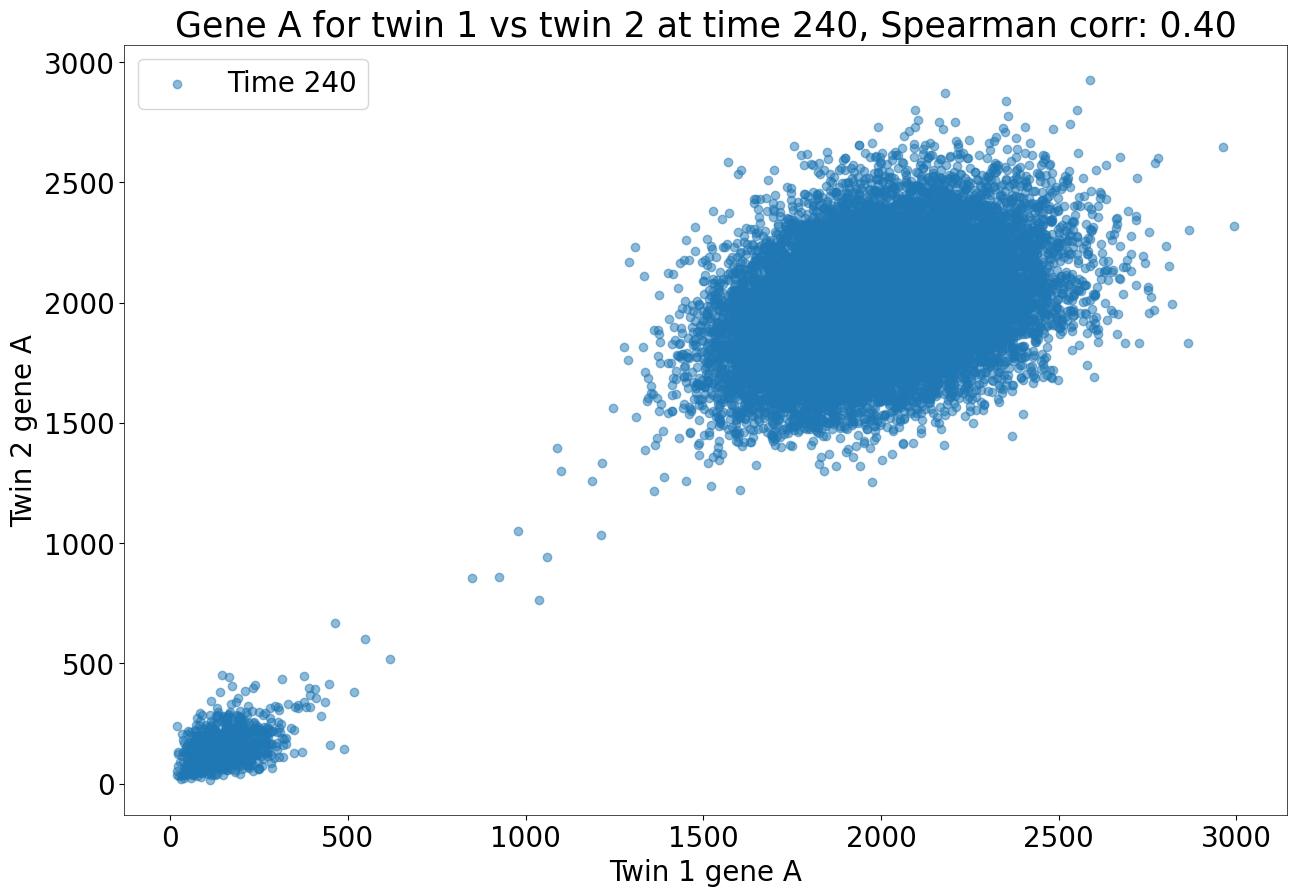

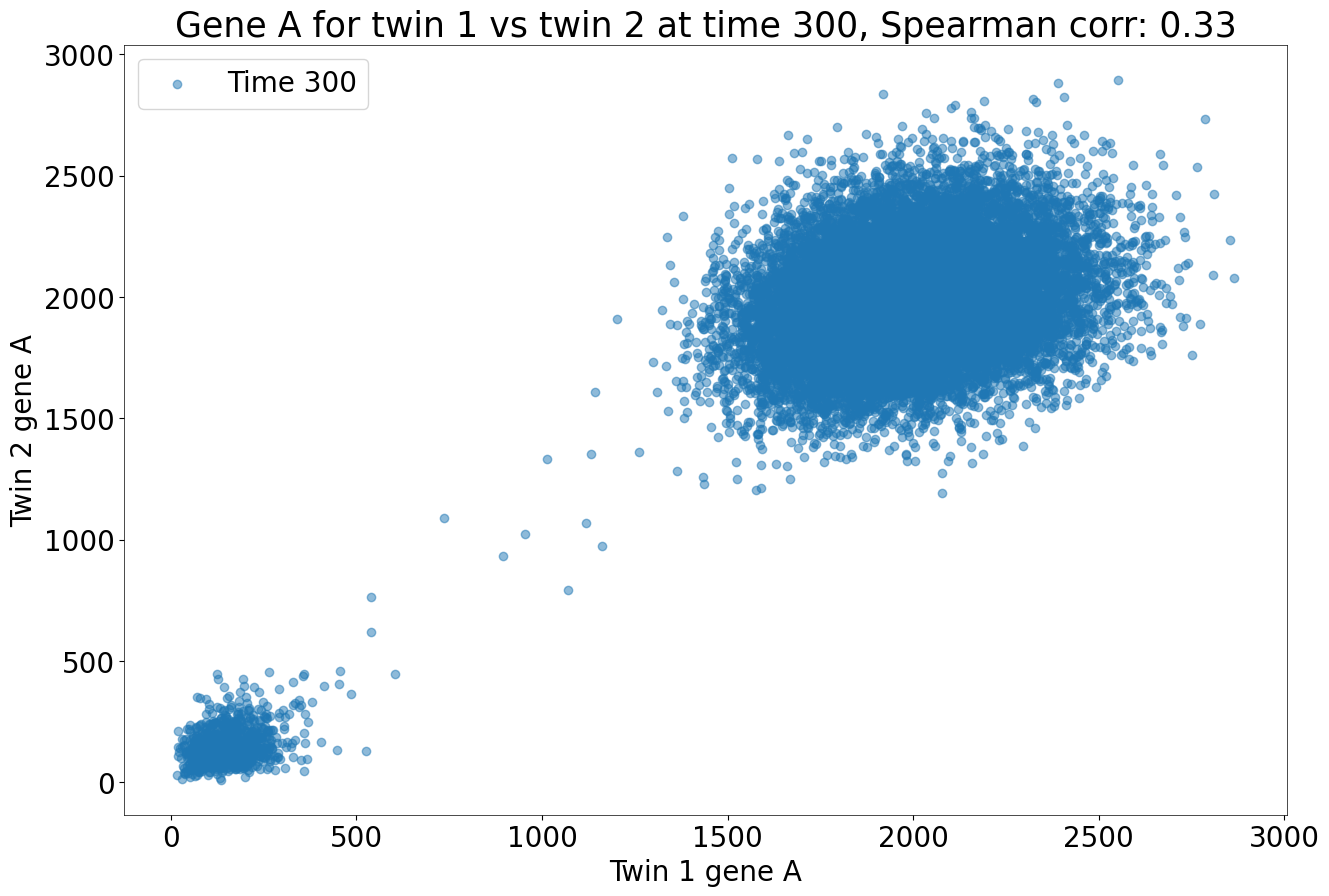

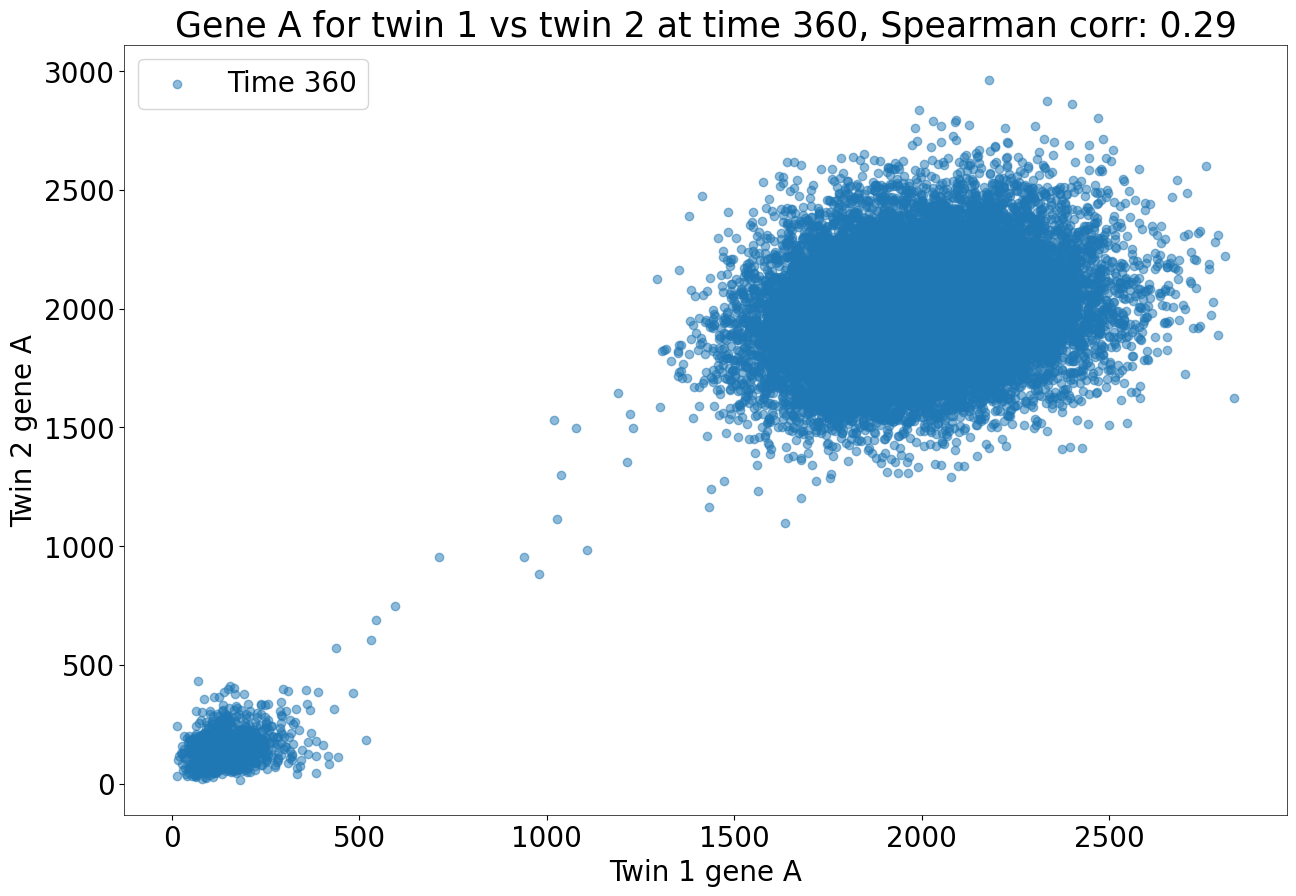

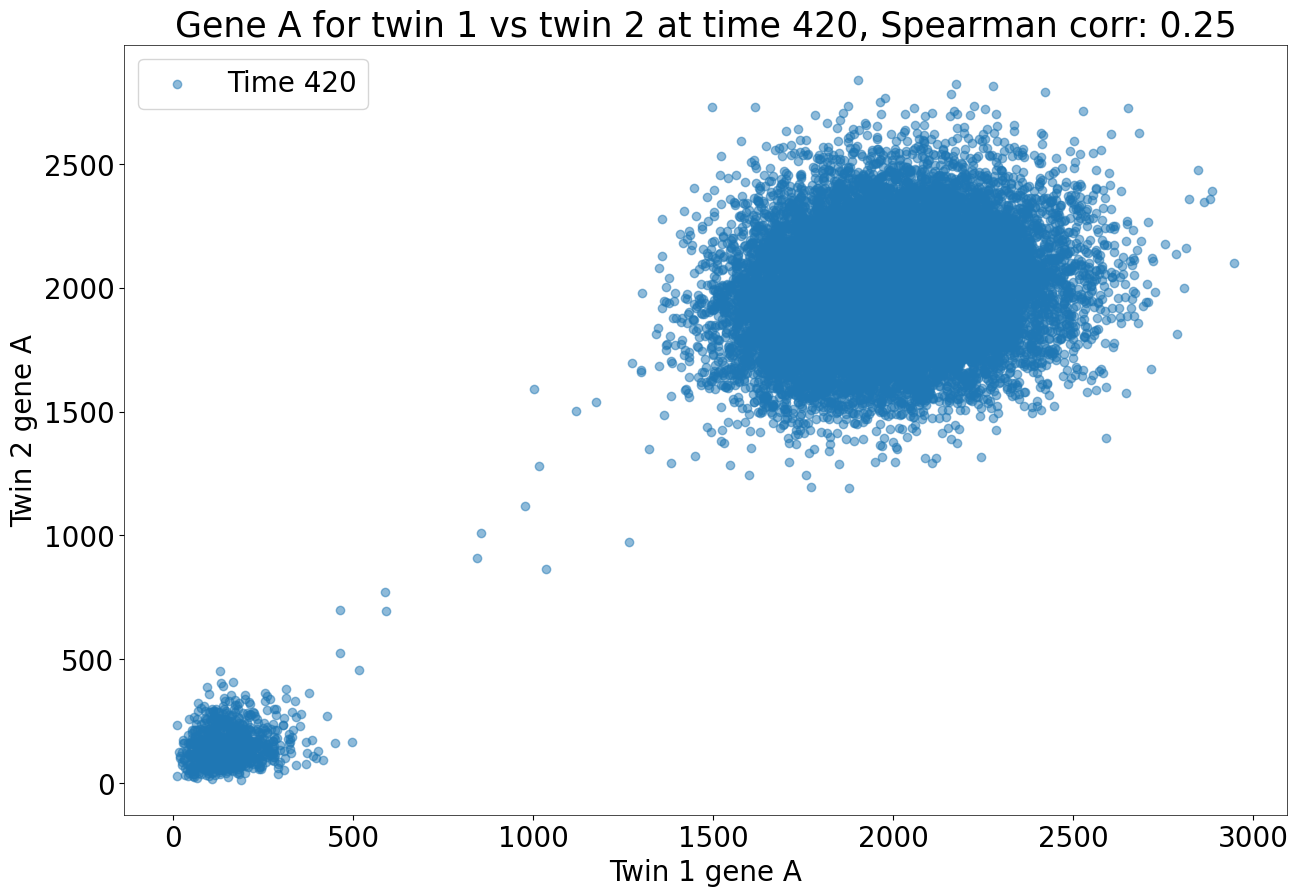

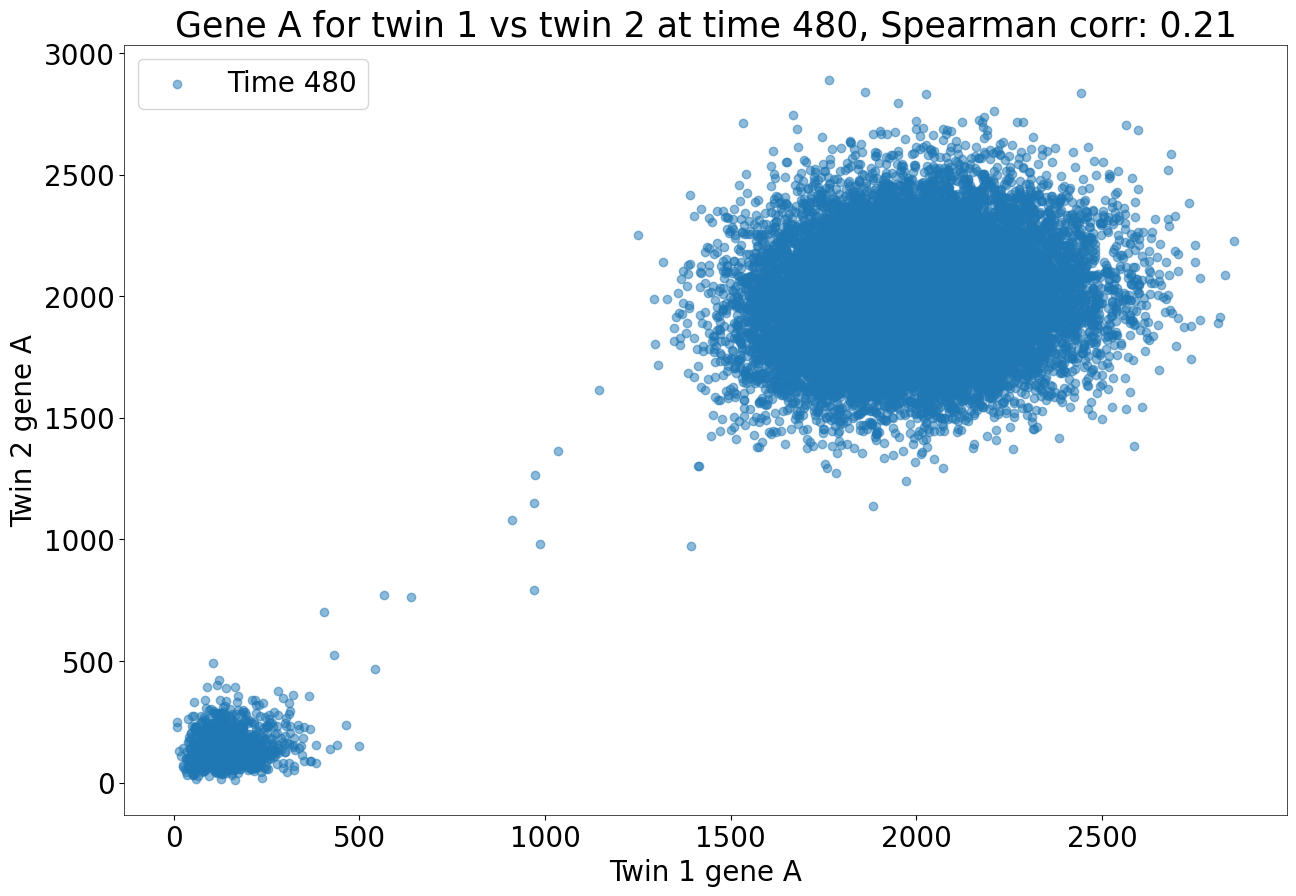

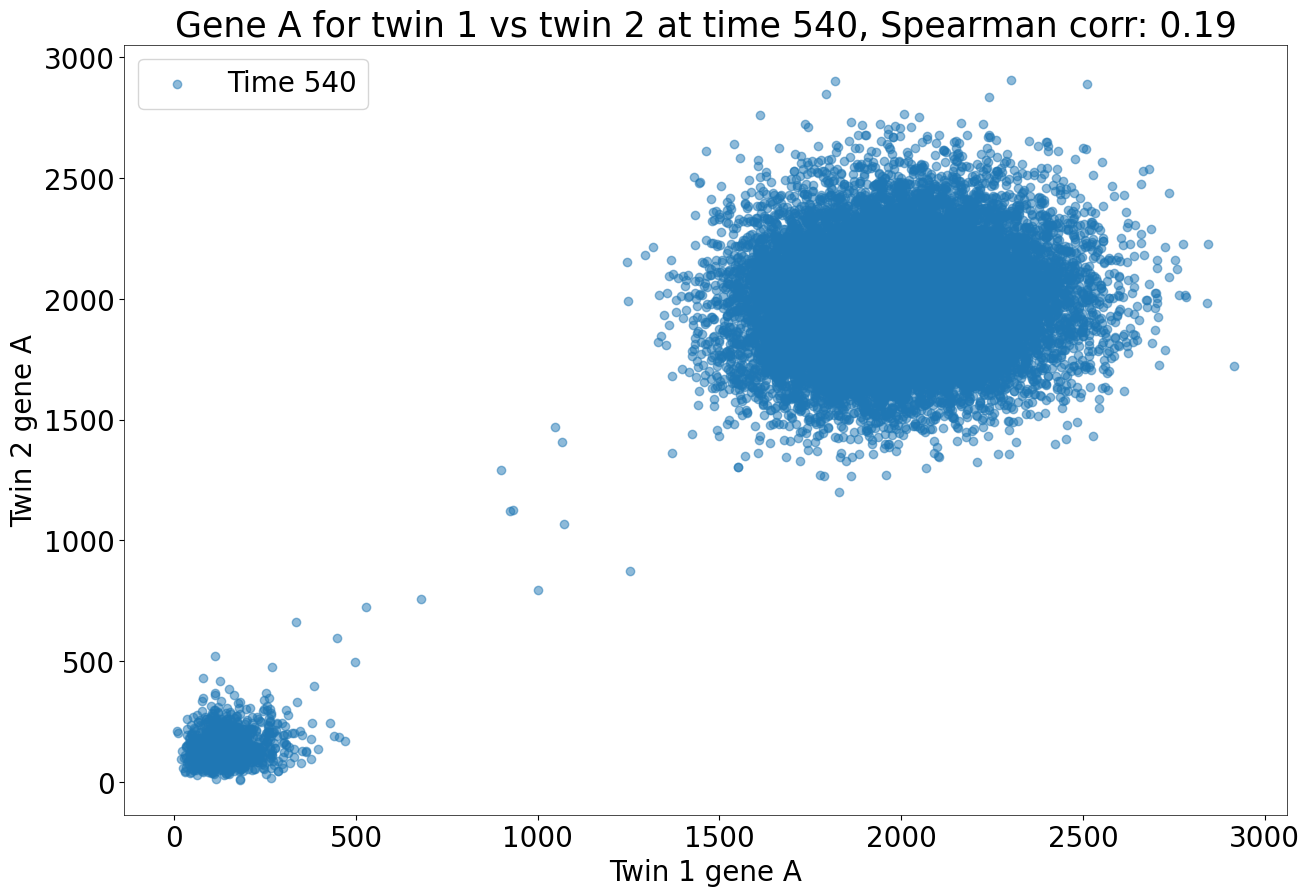

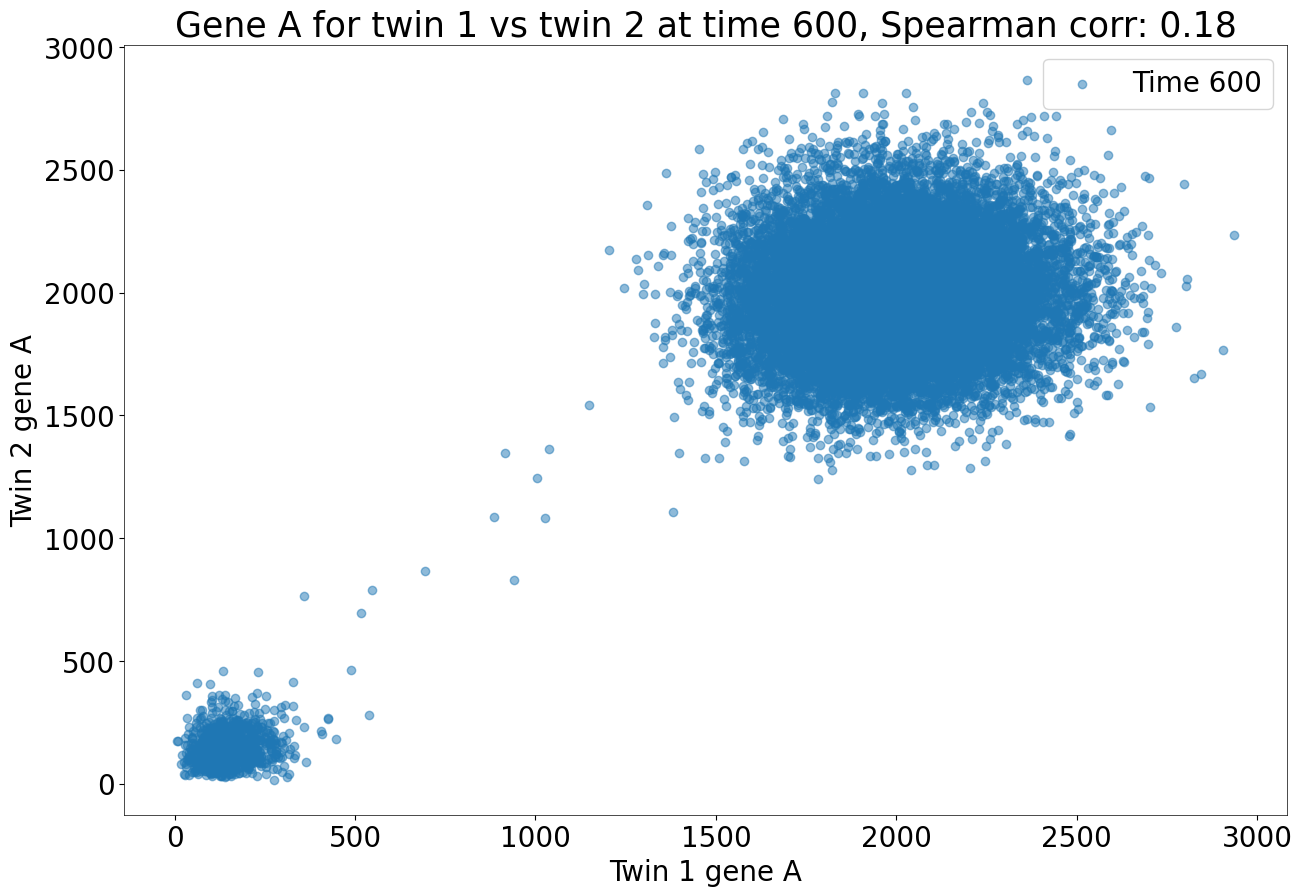

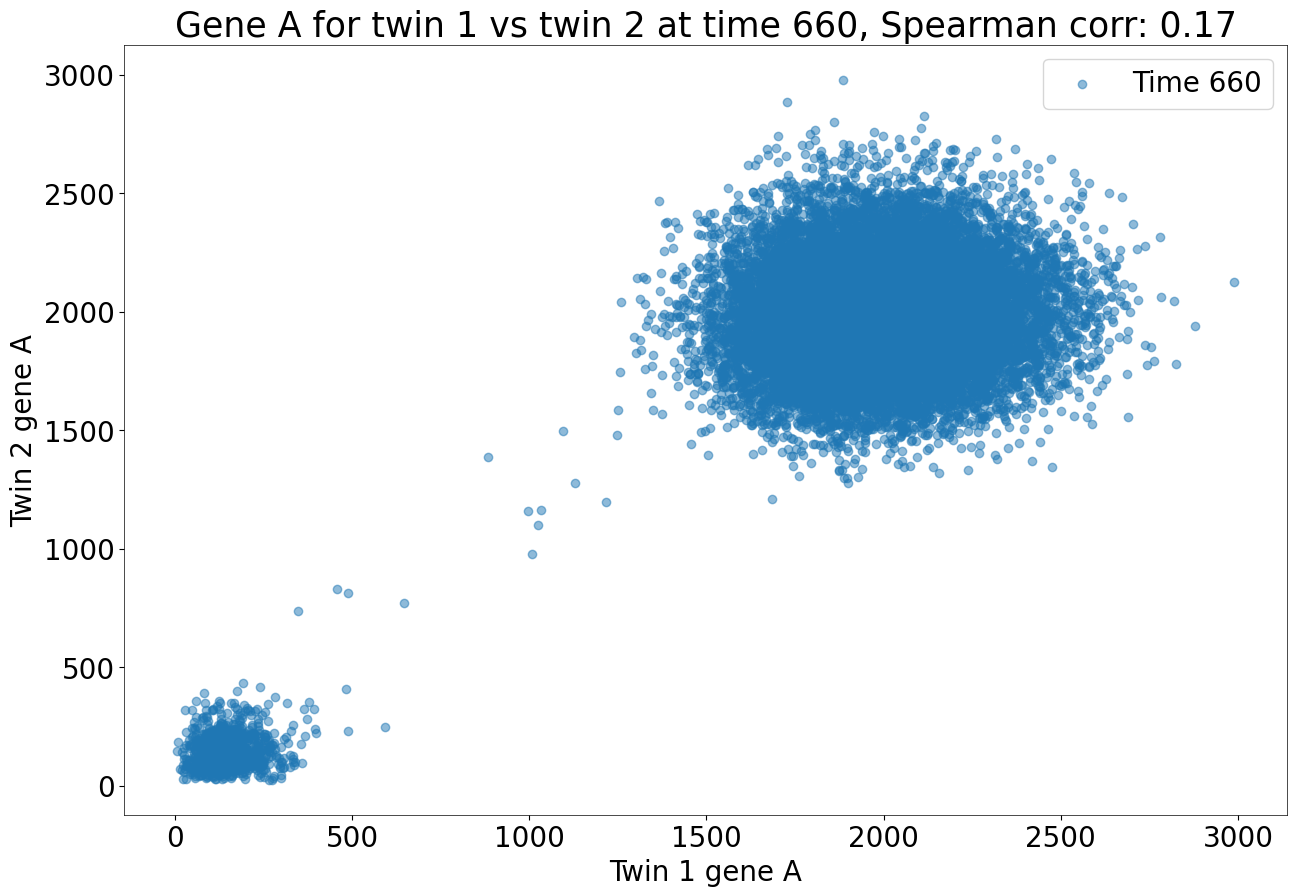

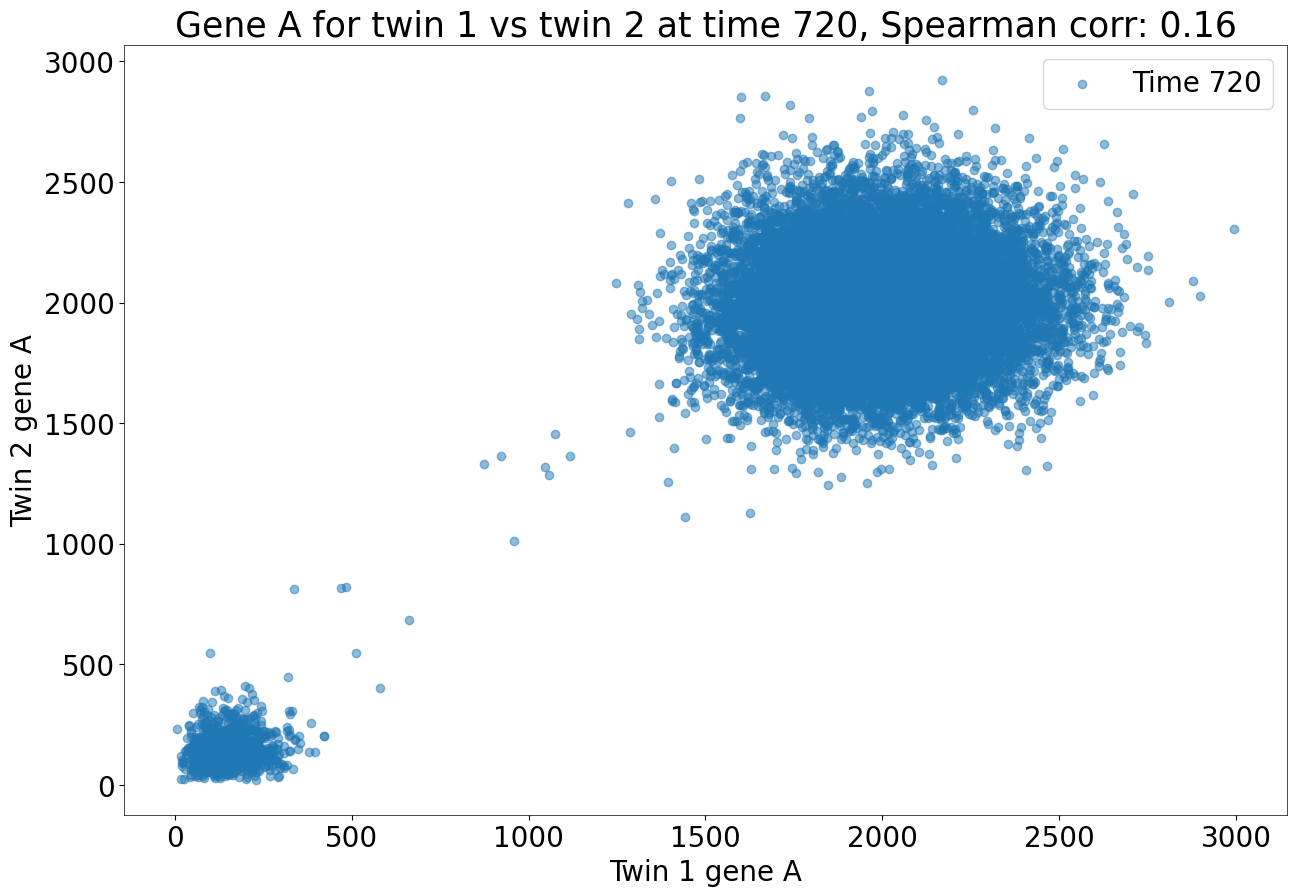

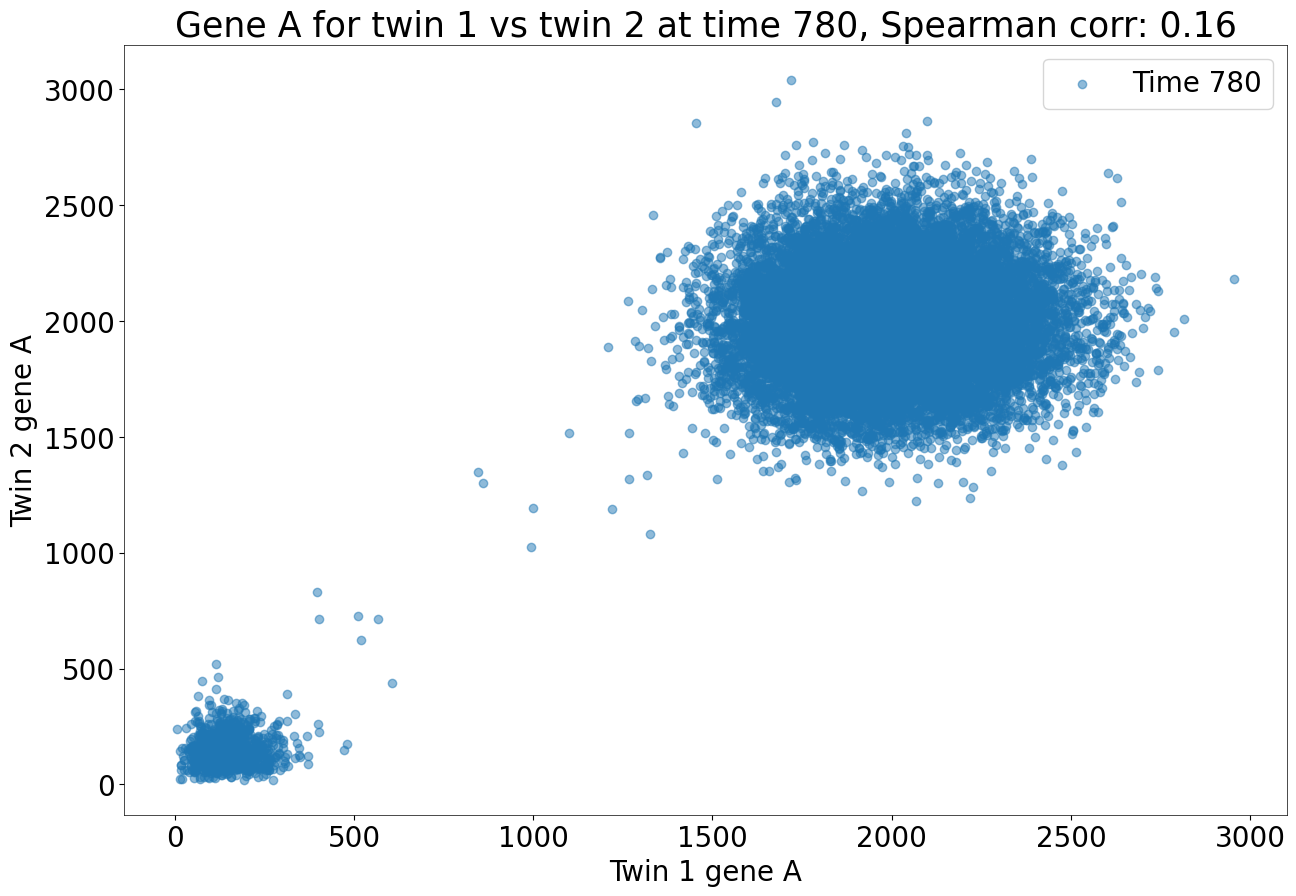

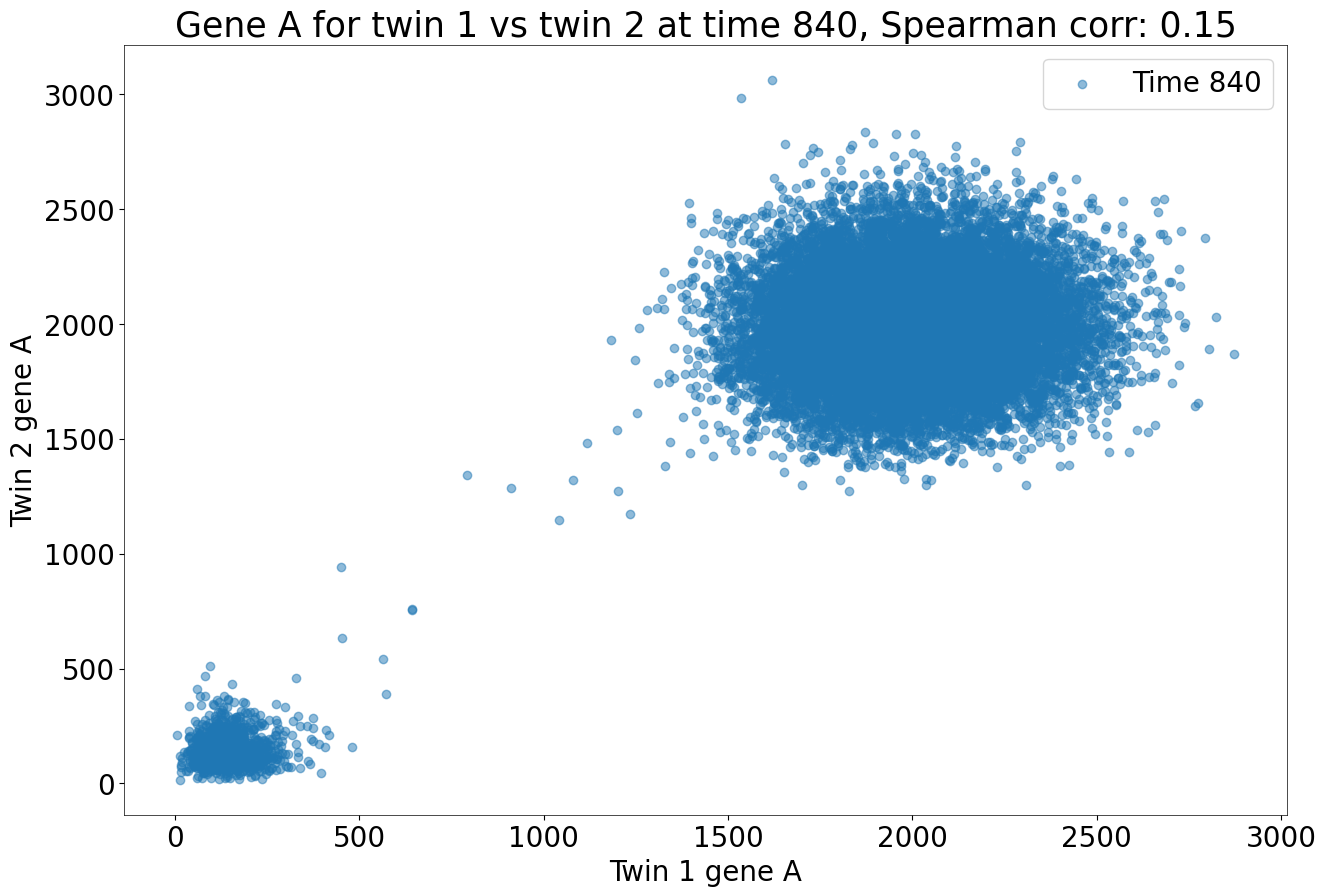

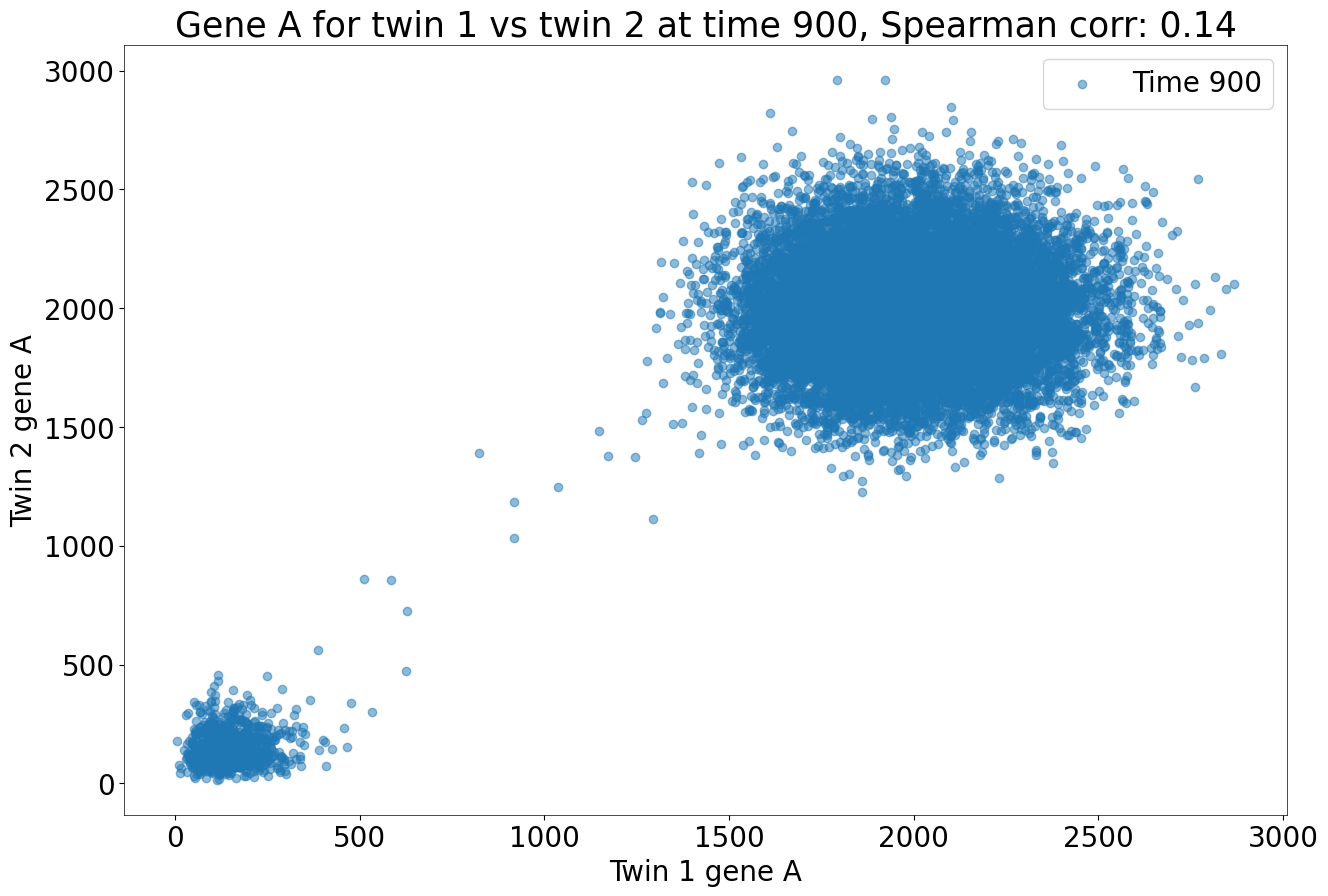

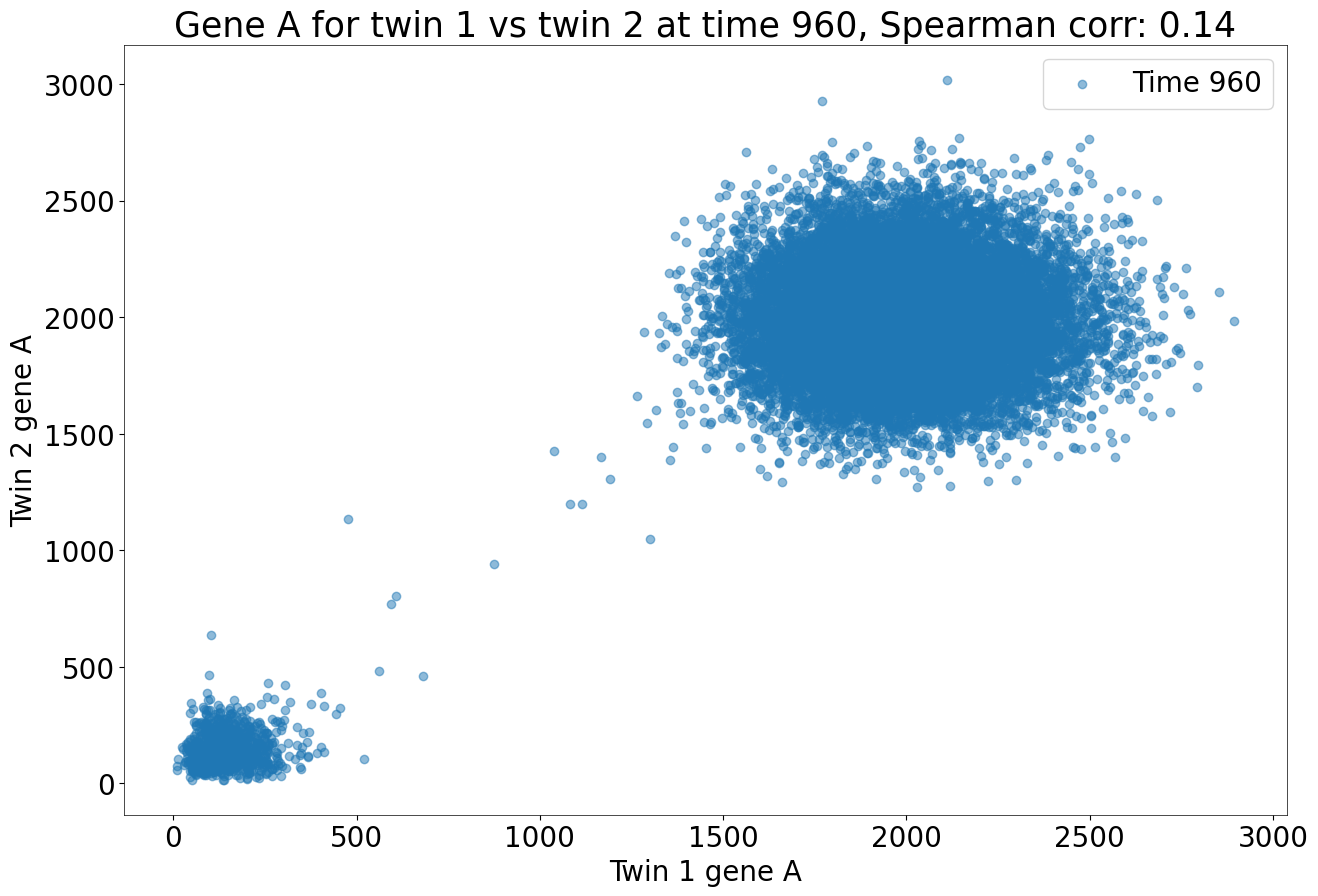

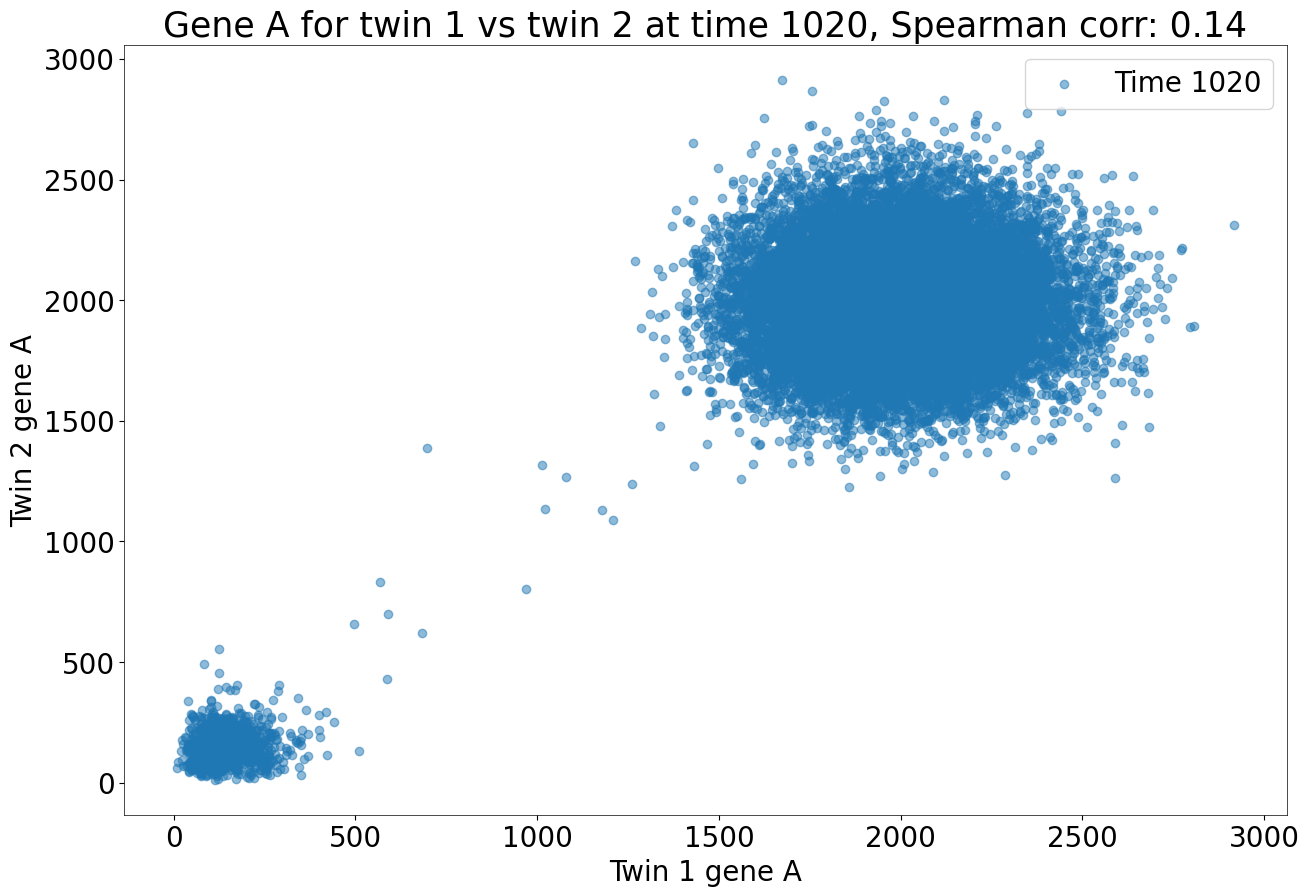

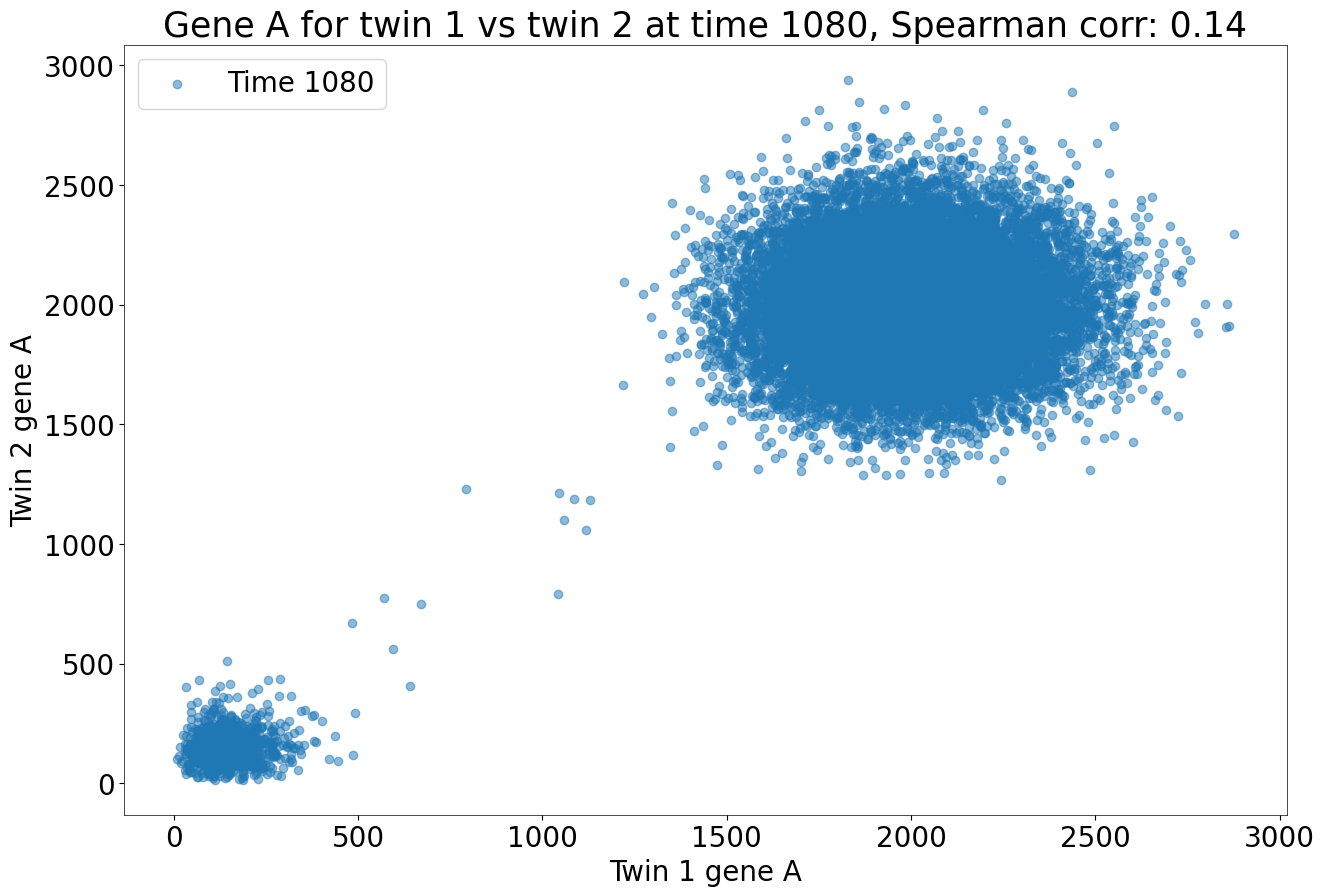

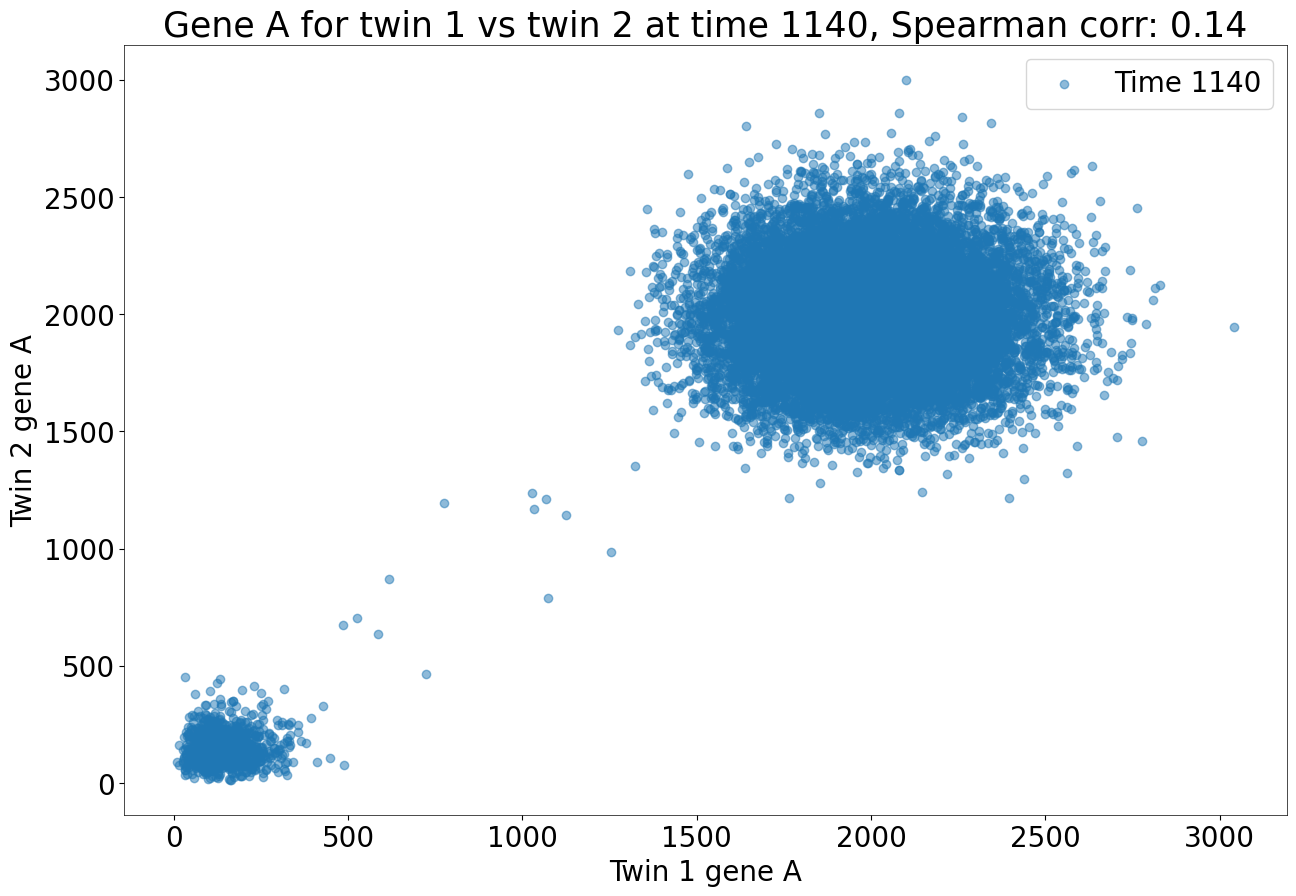

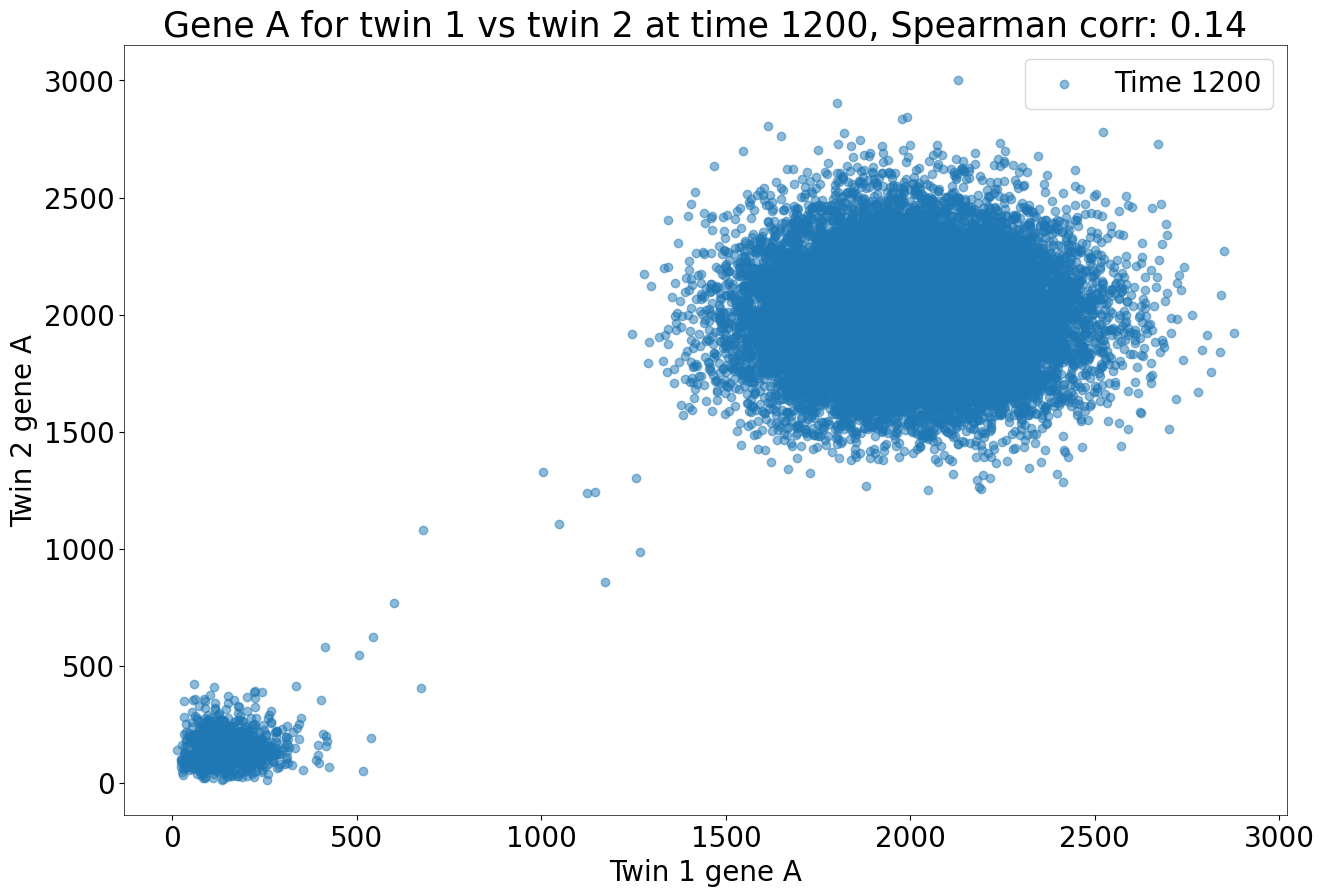

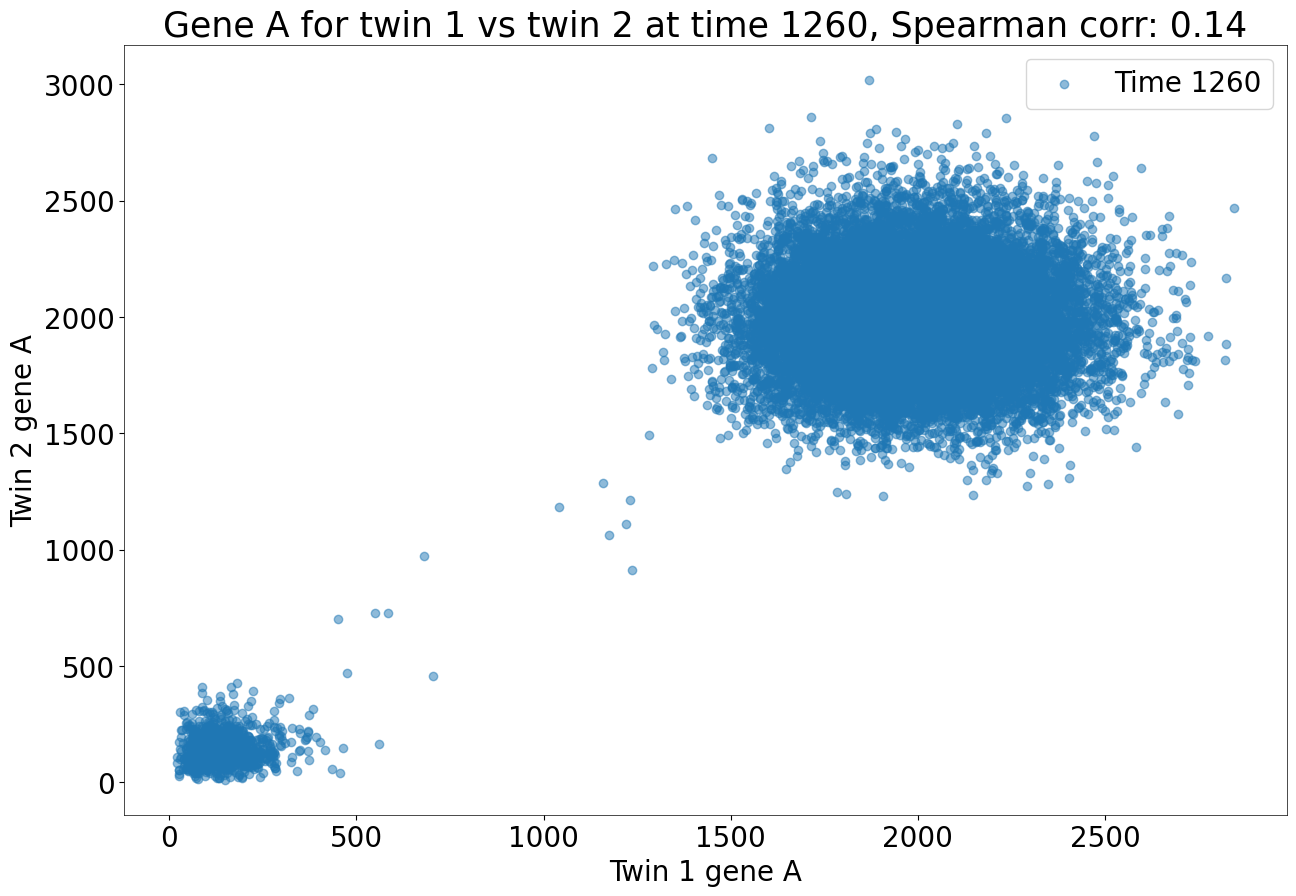

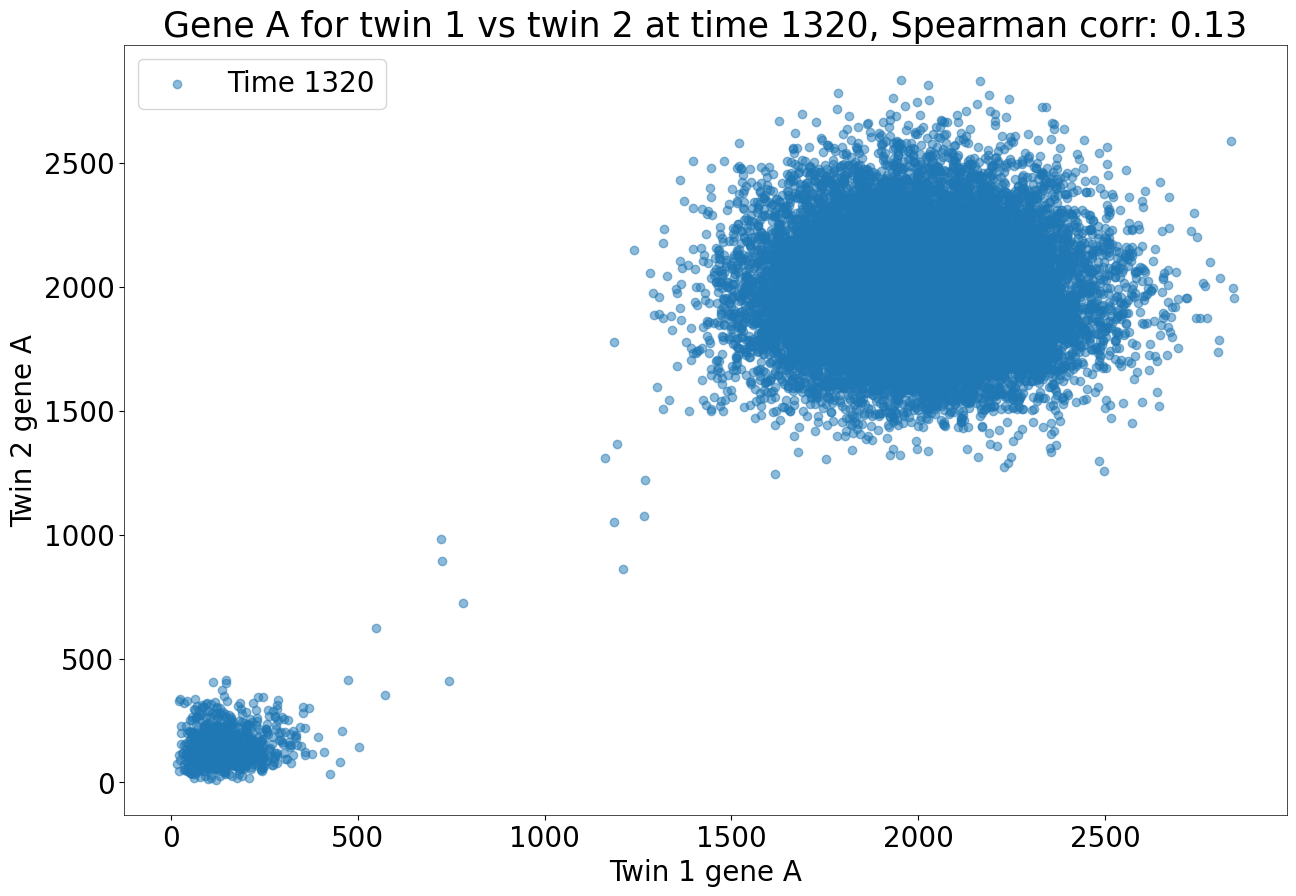

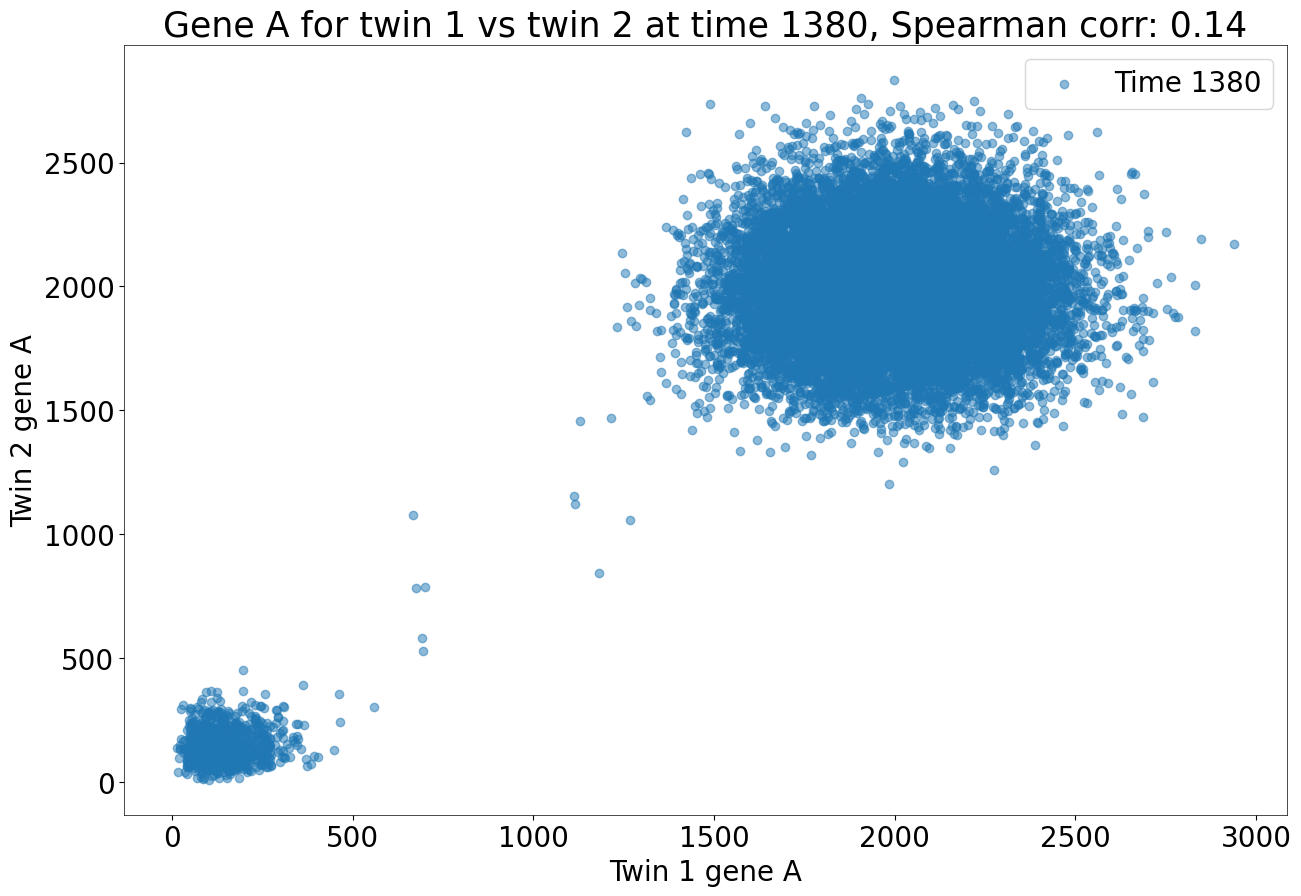

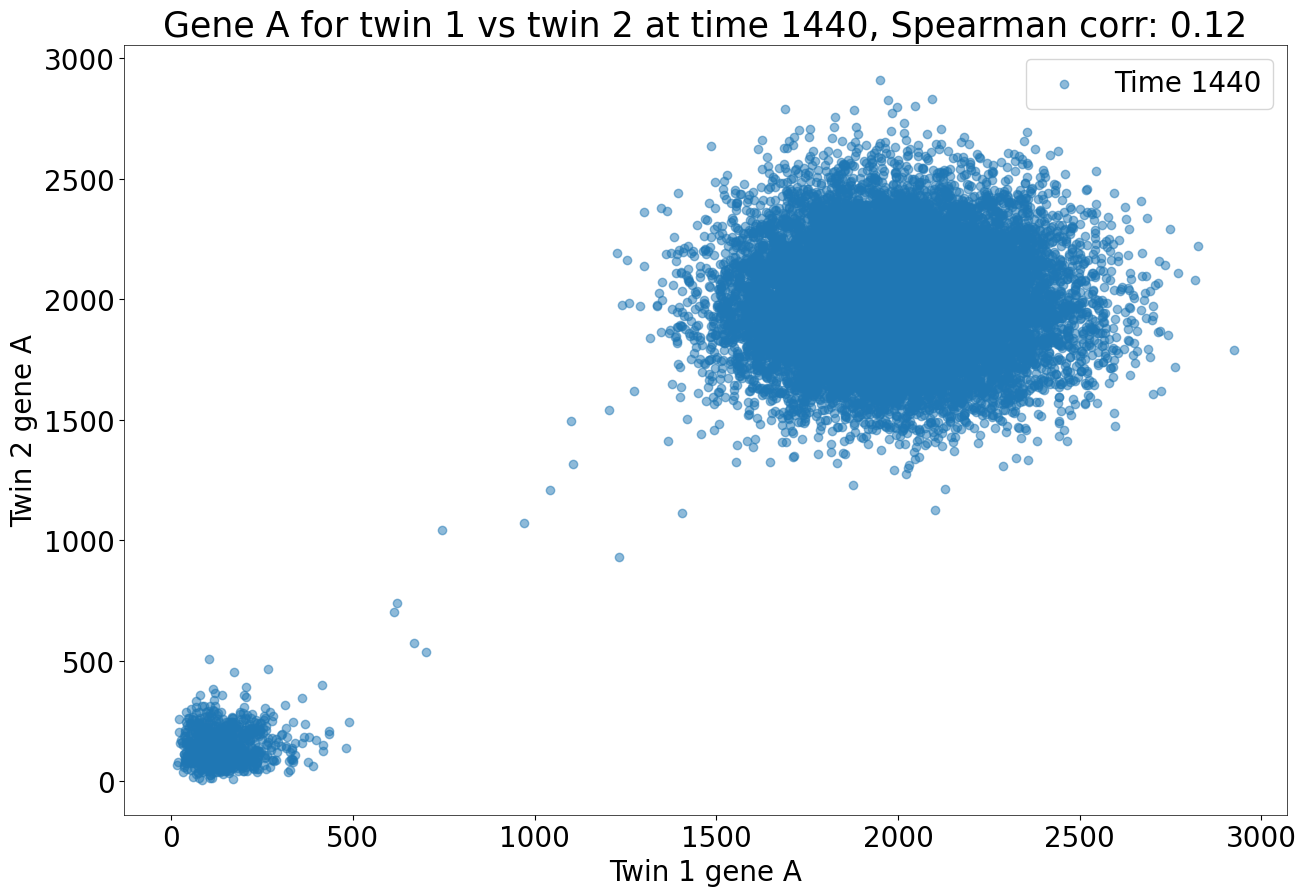

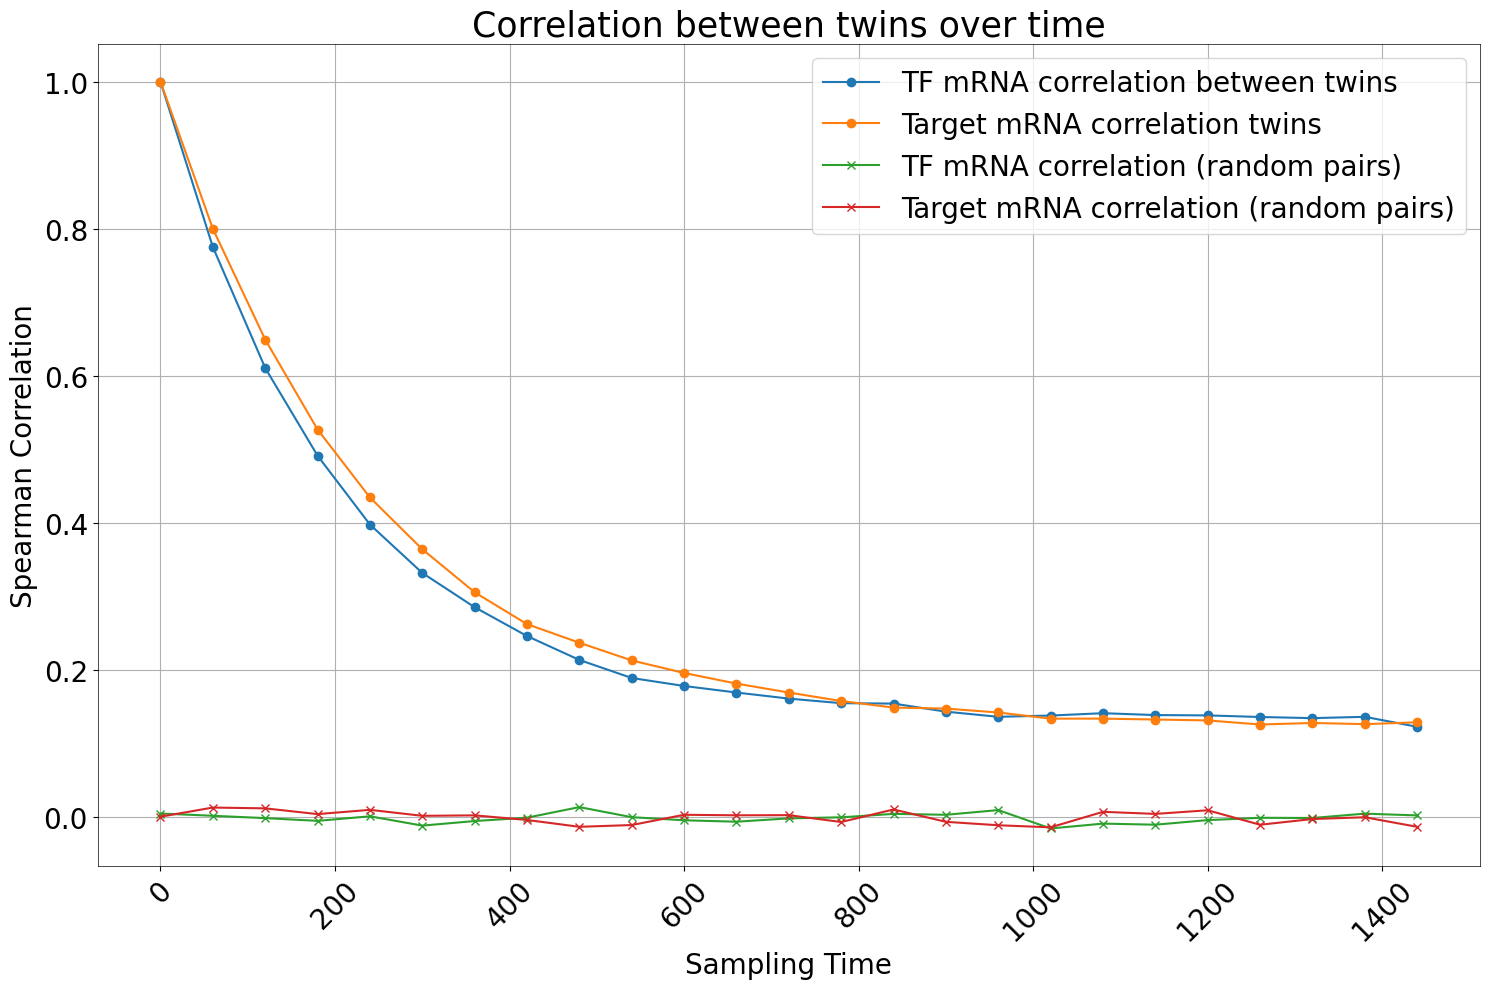

In [8]:

#Plot correlation between replicates over time
corr_list_tf = []
corr_list_target = []
corr_list_tf_random = []
corr_list_target_random = []
time_points = updated_df['sampling_time'].unique()
for time in time_points:
    singleTime_df = updated_df[updated_df['sampling_time'] == time]
    singleTime_df = singleTime_df.reset_index(drop=True)

    rep0 = singleTime_df[singleTime_df['replicate'] == 0]
    rep1 = singleTime_df[singleTime_df['replicate'] == 1]
    rep1_random = rep1.sample(frac=1).reset_index(drop=True)  # Randomize the order of replicate 1
    corr = spearmanr(rep0['total_TF_mRNA'], rep1['total_TF_mRNA'])[0]
    plt.scatter(rep0['total_TF_mRNA'], rep1['total_TF_mRNA'], alpha=0.5, label=f'Time {time}')
    plt.xlabel('Twin 1 gene A')
    plt.ylabel('Twin 2 gene A')
    plt.title(f'Gene A for twin 1 vs twin 2 at time {time}, Spearman corr: {corr:.2f}')
    plt.legend()
    plt.show()
    
    corr_list_tf.append(corr)
    corr = spearmanr(rep0['total_Target_mRNA'], rep1['total_Target_mRNA'])[0]
    corr_list_target.append(corr)
    corr_random = spearmanr(rep0['total_TF_mRNA'], rep1_random['total_TF_mRNA'])[0]
    corr_list_tf_random.append(corr_random)
    corr_random = spearmanr(rep0['total_Target_mRNA'], rep1_random['total_Target_mRNA'])[0]
    corr_list_target_random.append(corr_random)

plt.plot(time_points, corr_list_tf, label='TF mRNA correlation between twins', marker='o')
plt.plot(time_points, corr_list_target, label='Target mRNA correlation twins', marker='o')
plt.plot(time_points, corr_list_tf_random, label='TF mRNA correlation (random pairs)', marker='x')
plt.plot(time_points, corr_list_target_random, label='Target mRNA correlation (random pairs)', marker='x')
plt.xlabel('Sampling Time')
plt.ylabel('Spearman Correlation')
plt.title('Correlation between twins over time')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



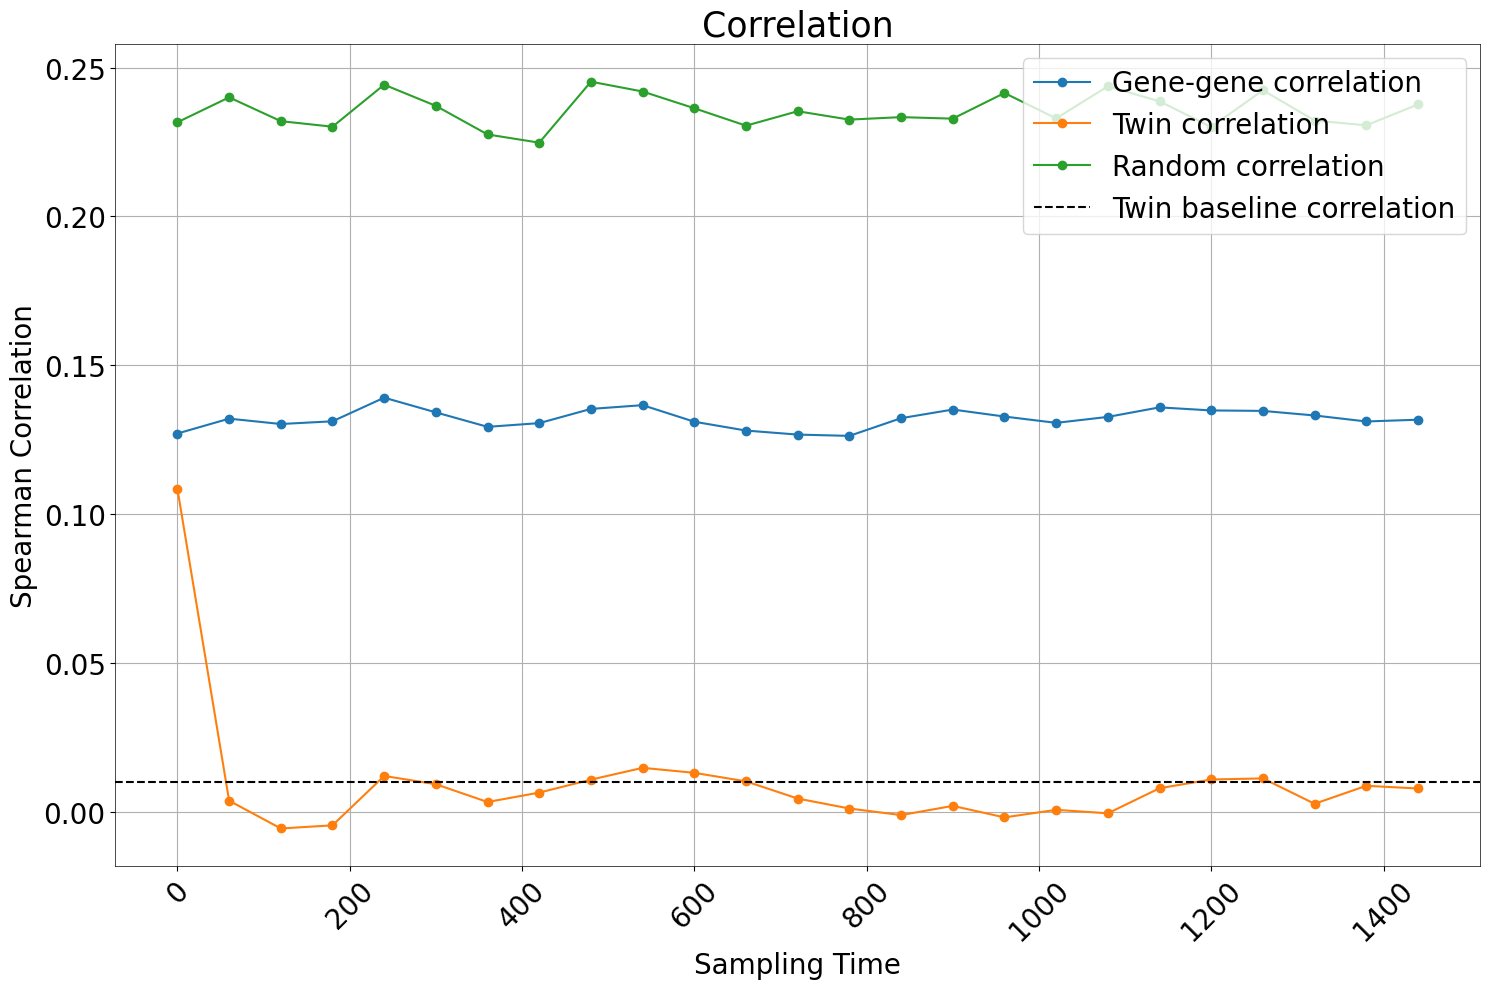

In [9]:

#Plot correlation between genes over time
corr_list_twin = []
corr_list_random = []
corr_list_gene  = []

time_points = updated_df['sampling_time'].unique()
for time in time_points:
    singleTime_df = updated_df[updated_df['sampling_time'] == time]
    singleTime_df = singleTime_df.reset_index(drop=True)
    # Calculate correlation between total_TF_mRNA and total_Target_mRNA for twin pairs
    corr = spearmanr(singleTime_df['total_TF_mRNA'], singleTime_df['total_Target_mRNA'])[0]
    # plt.scatter(singleTime_df['total_TF_mRNA'], singleTime_df['total_Target_mRNA'], alpha=0.5, label=f'Time {time}')
    # plt.xlabel('total_TF_mRNA')
    # plt.ylabel('total_Target_mRNA')
    # plt.title(f'Scatter plot of total_TF_mRNA vs total_Target_mRNA at time {time}, Spearman corr: {corr:.2e}')
    # plt.show()
    corr_list_gene.append(corr)
    rep0 = singleTime_df[singleTime_df['replicate'] == 0].reset_index(drop=True)
    rep1 = singleTime_df[singleTime_df['replicate'] == 1].reset_index(drop=True)
    corr = spearmanr(rep0['total_TF_mRNA'] - rep1['total_TF_mRNA'], rep0['total_Target_mRNA'] - rep1['total_Target_mRNA'])[0]
    corr_list_twin.append(corr)
    rep1_random = rep1.sample(frac=1).reset_index(drop=True)  # Randomize the order of replicate 1
    corr_random = spearmanr(rep0['total_TF_mRNA'] - rep1_random['total_TF_mRNA'], rep0['total_Target_mRNA'] - rep1_random['total_Target_mRNA'])[0]
    corr_list_random.append(corr_random)

plt.plot(time_points, corr_list_gene, label='Gene-gene correlation', marker='o')
plt.plot(time_points, corr_list_twin, label='Twin correlation', marker='o')
plt.plot(time_points, corr_list_random, label='Random correlation', marker='o')
plt.axhline(0.01, label = "Twin baseline correlation", linestyle = "--", color = "black")
plt.xlabel('Sampling Time')
plt.ylabel('Spearman Correlation')
plt.title('Correlation')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



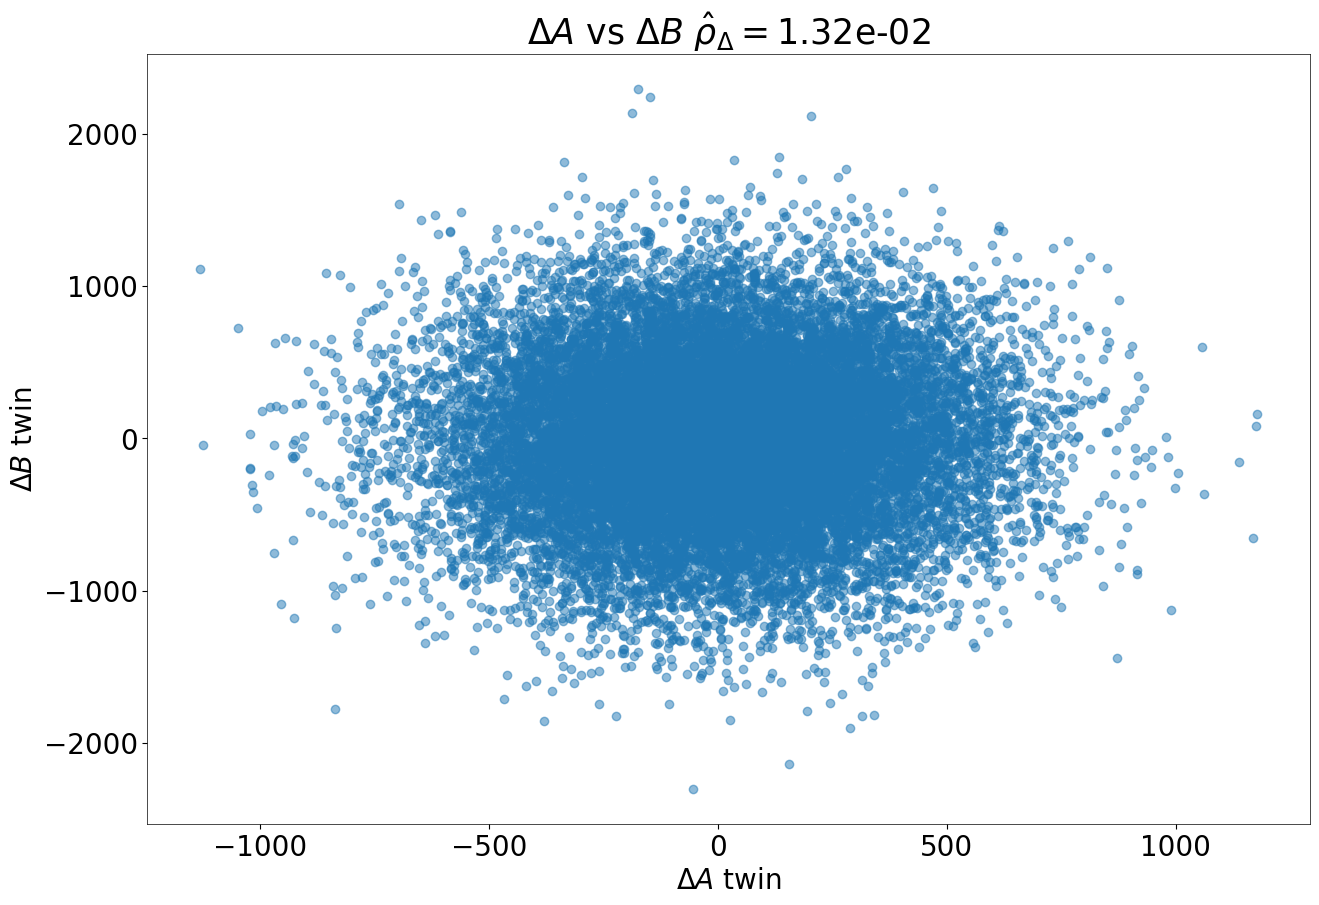

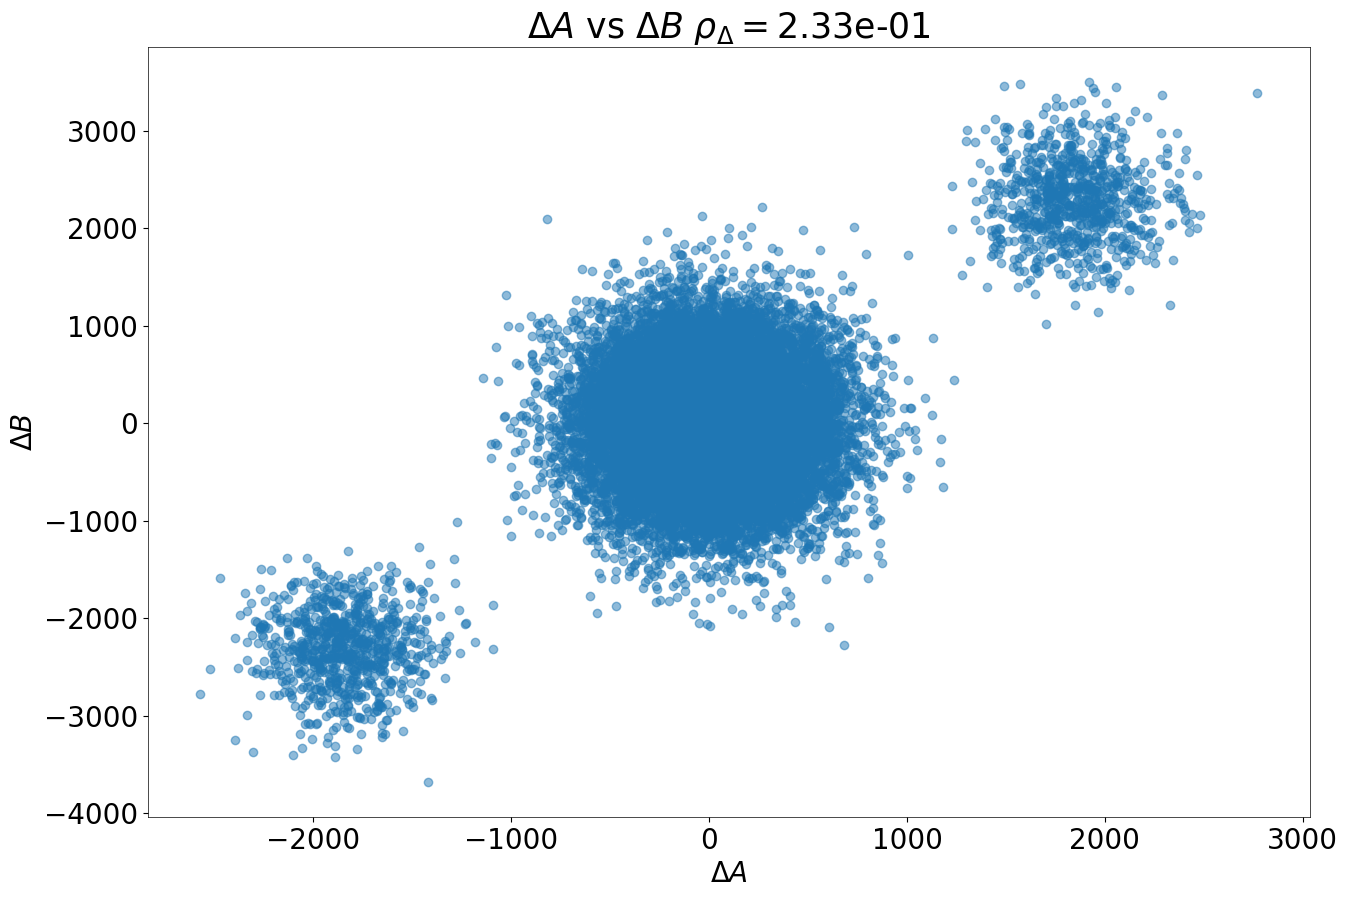

In [10]:
#Test twins and random pair correlation
time =600
singleTime_df = updated_df[updated_df['sampling_time'] == time]
singleTime_df = singleTime_df.reset_index(drop=True)

rep0 = singleTime_df[singleTime_df['replicate'] == 0]
rep1 = singleTime_df[singleTime_df['replicate'] == 1]

rep0 = rep0.reset_index(drop=True)
rep1 = rep1.reset_index(drop=True)
diff_TF = rep0['total_TF_mRNA'] - rep1['total_TF_mRNA']
diff_Target = rep0['total_Target_mRNA'] - rep1['total_Target_mRNA']
rep1_random = rep1.sample(frac=1).reset_index(drop=True)
diff_TF_random = rep0['total_TF_mRNA'] - rep1_random['total_TF_mRNA']
diff_Target_random = rep0['total_Target_mRNA'] - rep1_random['total_Target_mRNA']

plt.scatter(diff_TF, diff_Target, alpha=0.5)
corr = spearmanr(diff_TF, diff_Target)
plt.xlabel(r'$\Delta A$ twin')
plt.ylabel(r'$\Delta B$ twin')
plt.title(rf'$\Delta A$ vs $\Delta B$ $\hat{{\rho}}_{{\Delta}}=${corr.correlation:.2e}')
plt.show()

plt.scatter(diff_TF_random, diff_Target_random, alpha=0.5)
corr = spearmanr(diff_TF_random, diff_Target_random)
plt.xlabel(r'$\Delta A$')
plt.ylabel(r'$\Delta B$')
plt.title(rf'$\Delta A$ vs $\Delta B$ $\rho_{{\Delta}}=${corr.correlation:.2e}')
plt.show()



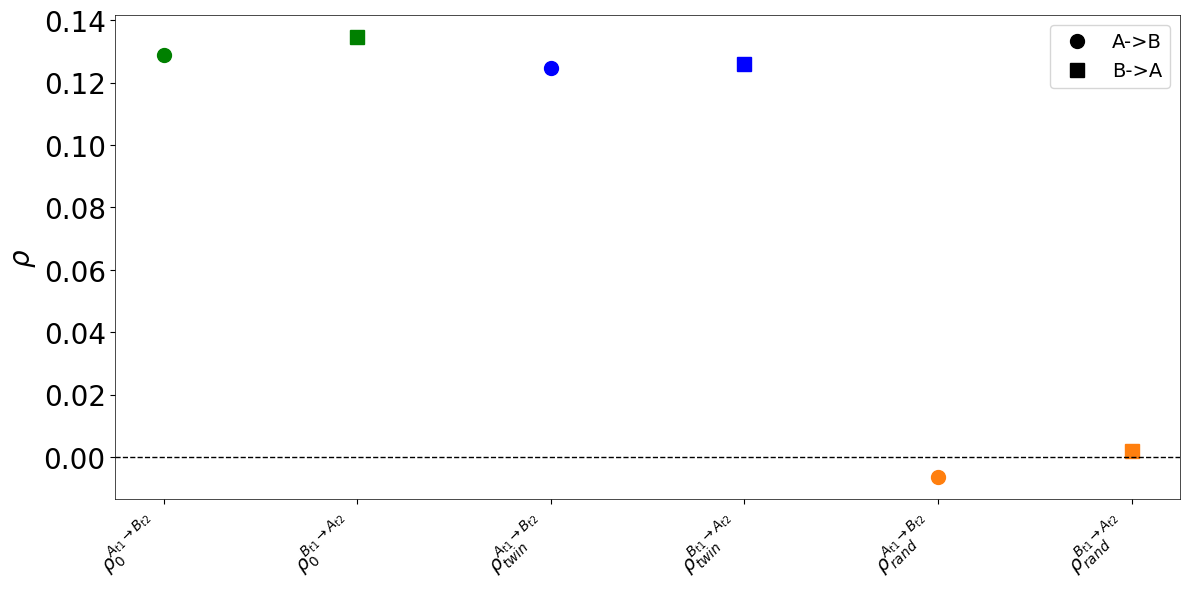

In [11]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# --- Load simulation file ---
# path_to_file = '/home/mzo5929/Keerthana/grnInference/simulationData/two_way_regulation/test/samples_replicates_with_regulation_0.csv'
sim_file = pd.read_csv(sim_file_use)

# --- Extract replicates at t1 and t2 ---
t1 = 300
t2 = 600

t1_sim = sim_file[sim_file['sampling_time'] == t1].reset_index(drop=True)
t2_sim = sim_file[sim_file['sampling_time'] == t2].reset_index(drop=True)

rep0_t1 = t1_sim[t1_sim['replicate'] == 0].reset_index(drop=True)
rep1_t1 = t1_sim[t1_sim['replicate'] == 1].reset_index(drop=True)
rep0_t2 = t2_sim[t2_sim['replicate'] == 0].reset_index(drop=True)
rep1_t2 = t2_sim[t2_sim['replicate'] == 1].reset_index(drop=True)

# --- Randomly paired replicates ---
rand0_t1 = rep0_t1.sample(frac=1, random_state=0, ignore_index=True)
rand1_t1 = rep1_t1.sample(frac=1, random_state=1, ignore_index=True)
rand0_t2 = rep0_t2.sample(frac=1, random_state=2, ignore_index=True)
rand1_t2 = rep1_t2.sample(frac=1, random_state=3, ignore_index=True)

# --- Compute correlations ---
corrs = {
    r'$\rho_{0}^{A_{t1} \rightarrow B_{t2}}$': spearmanr(t1_sim['total_TF_mRNA'], t2_sim['total_Target_mRNA'])[0],
    r'$\rho_{0}^{B_{t1} \rightarrow A_{t2}}$': spearmanr(t1_sim['total_Target_mRNA'], t2_sim['total_TF_mRNA'])[0],
    r'$\rho_{twin}^{A_{t1} \rightarrow B_{t2}}$': 0.5 * (
        spearmanr(rep0_t1['total_TF_mRNA'], rep1_t2['total_Target_mRNA'])[0] +
        spearmanr(rep1_t1['total_TF_mRNA'], rep0_t2['total_Target_mRNA'])[0]
    ),
    r'$\rho_{twin}^{B_{t1} \rightarrow A_{t2}}$': 0.5 * (
        spearmanr(rep0_t1['total_Target_mRNA'], rep1_t2['total_TF_mRNA'])[0] +
        spearmanr(rep1_t1['total_Target_mRNA'], rep0_t2['total_TF_mRNA'])[0]
    ),
    r'$\rho_{rand}^{A_{t1} \rightarrow B_{t2}}$': 0.5 * (
        spearmanr(rand0_t1['total_TF_mRNA'], rand1_t2['total_Target_mRNA'])[0] +
        spearmanr(rand1_t1['total_TF_mRNA'], rand0_t2['total_Target_mRNA'])[0]
    ),
    r'$\rho_{rand}^{B_{t1} \rightarrow A_{t2}}$': 0.5 * (
        spearmanr(rand0_t1['total_Target_mRNA'], rand1_t2['total_TF_mRNA'])[0] +
        spearmanr(rand1_t1['total_Target_mRNA'], rand0_t2['total_TF_mRNA'])[0]
    )
}

# --- Plotting ---
plt.figure(figsize=(12, 6))
colors = ['green', 'green', 'blue', 'blue', '#ff7f0e', '#ff7f0e']
markers = ['o', 's', 'o', 's', 'o', 's']
x_labels = list(corrs.keys())
x_vals = np.arange(len(corrs))

for i, (label, val) in enumerate(corrs.items()):
    plt.plot(i, val, marker=markers[i], color=colors[i], markersize=10, linestyle='None')

# Format axes
plt.ylabel(r'$\rho$', fontsize=20)
plt.xticks(ticks=x_vals, labels=x_labels, rotation=45, ha='right', fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
# plt.yticks(np.arange(-0.00, 0.21, 0.05), fontsize=14)
# plt.ylim(-0.01, 0.2)
plt.tight_layout()

# Legends
marker_legend = [
    Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=10, label='A->B'),
    Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=10, label='B->A')
]
plt.legend(handles=marker_legend, loc='upper right', fontsize=14)

plt.show()
